In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [2]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [3]:
# reading the files
audio_dataset_path = "/Users/italiyarishi/Desktop/Atlas/Sem 6/minor project/UrbanSound8K/audio/"

# loading the csv
meta_data = pd.read_csv("/Users/italiyarishi/Desktop/Atlas/Sem 6/minor project/UrbanSound8K/metadata/UrbanSound8K.csv")
meta_data["class"] = meta_data["class"].replace(
    to_replace="air_conditioner", value="Air Conditioner"
)
meta_data["class"] = meta_data["class"].replace(to_replace="car_horn", value="Car Horn")
meta_data["class"] = meta_data["class"].replace(
    to_replace="children_playing", value="Children Playing"
)
meta_data["class"] = meta_data["class"].replace(to_replace="dog_bark", value="Dog Bark")
meta_data["class"] = meta_data["class"].replace(to_replace="drilling", value="Drilling")
meta_data["class"] = meta_data["class"].replace(
    to_replace="engine_idling", value="Engine Idling"
)
meta_data["class"] = meta_data["class"].replace(to_replace="gun_shot", value="Gun Shot")
meta_data["class"] = meta_data["class"].replace(
    to_replace="jackhammer", value="Jackhammer"
)
meta_data["class"] = meta_data["class"].replace(to_replace="siren", value="Siren")
meta_data["class"] = meta_data["class"].replace(
    to_replace="street_music", value="Street Music"
)
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,Dog Bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,Children Playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,Children Playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,Children Playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,Children Playing


In [4]:
meta_data.groupby("classID")["class"].unique()

classID
0     [Air Conditioner]
1            [Car Horn]
2    [Children Playing]
3            [Dog Bark]
4            [Drilling]
5       [Engine Idling]
6            [Gun Shot]
7          [Jackhammer]
8               [Siren]
9        [Street Music]
Name: class, dtype: object

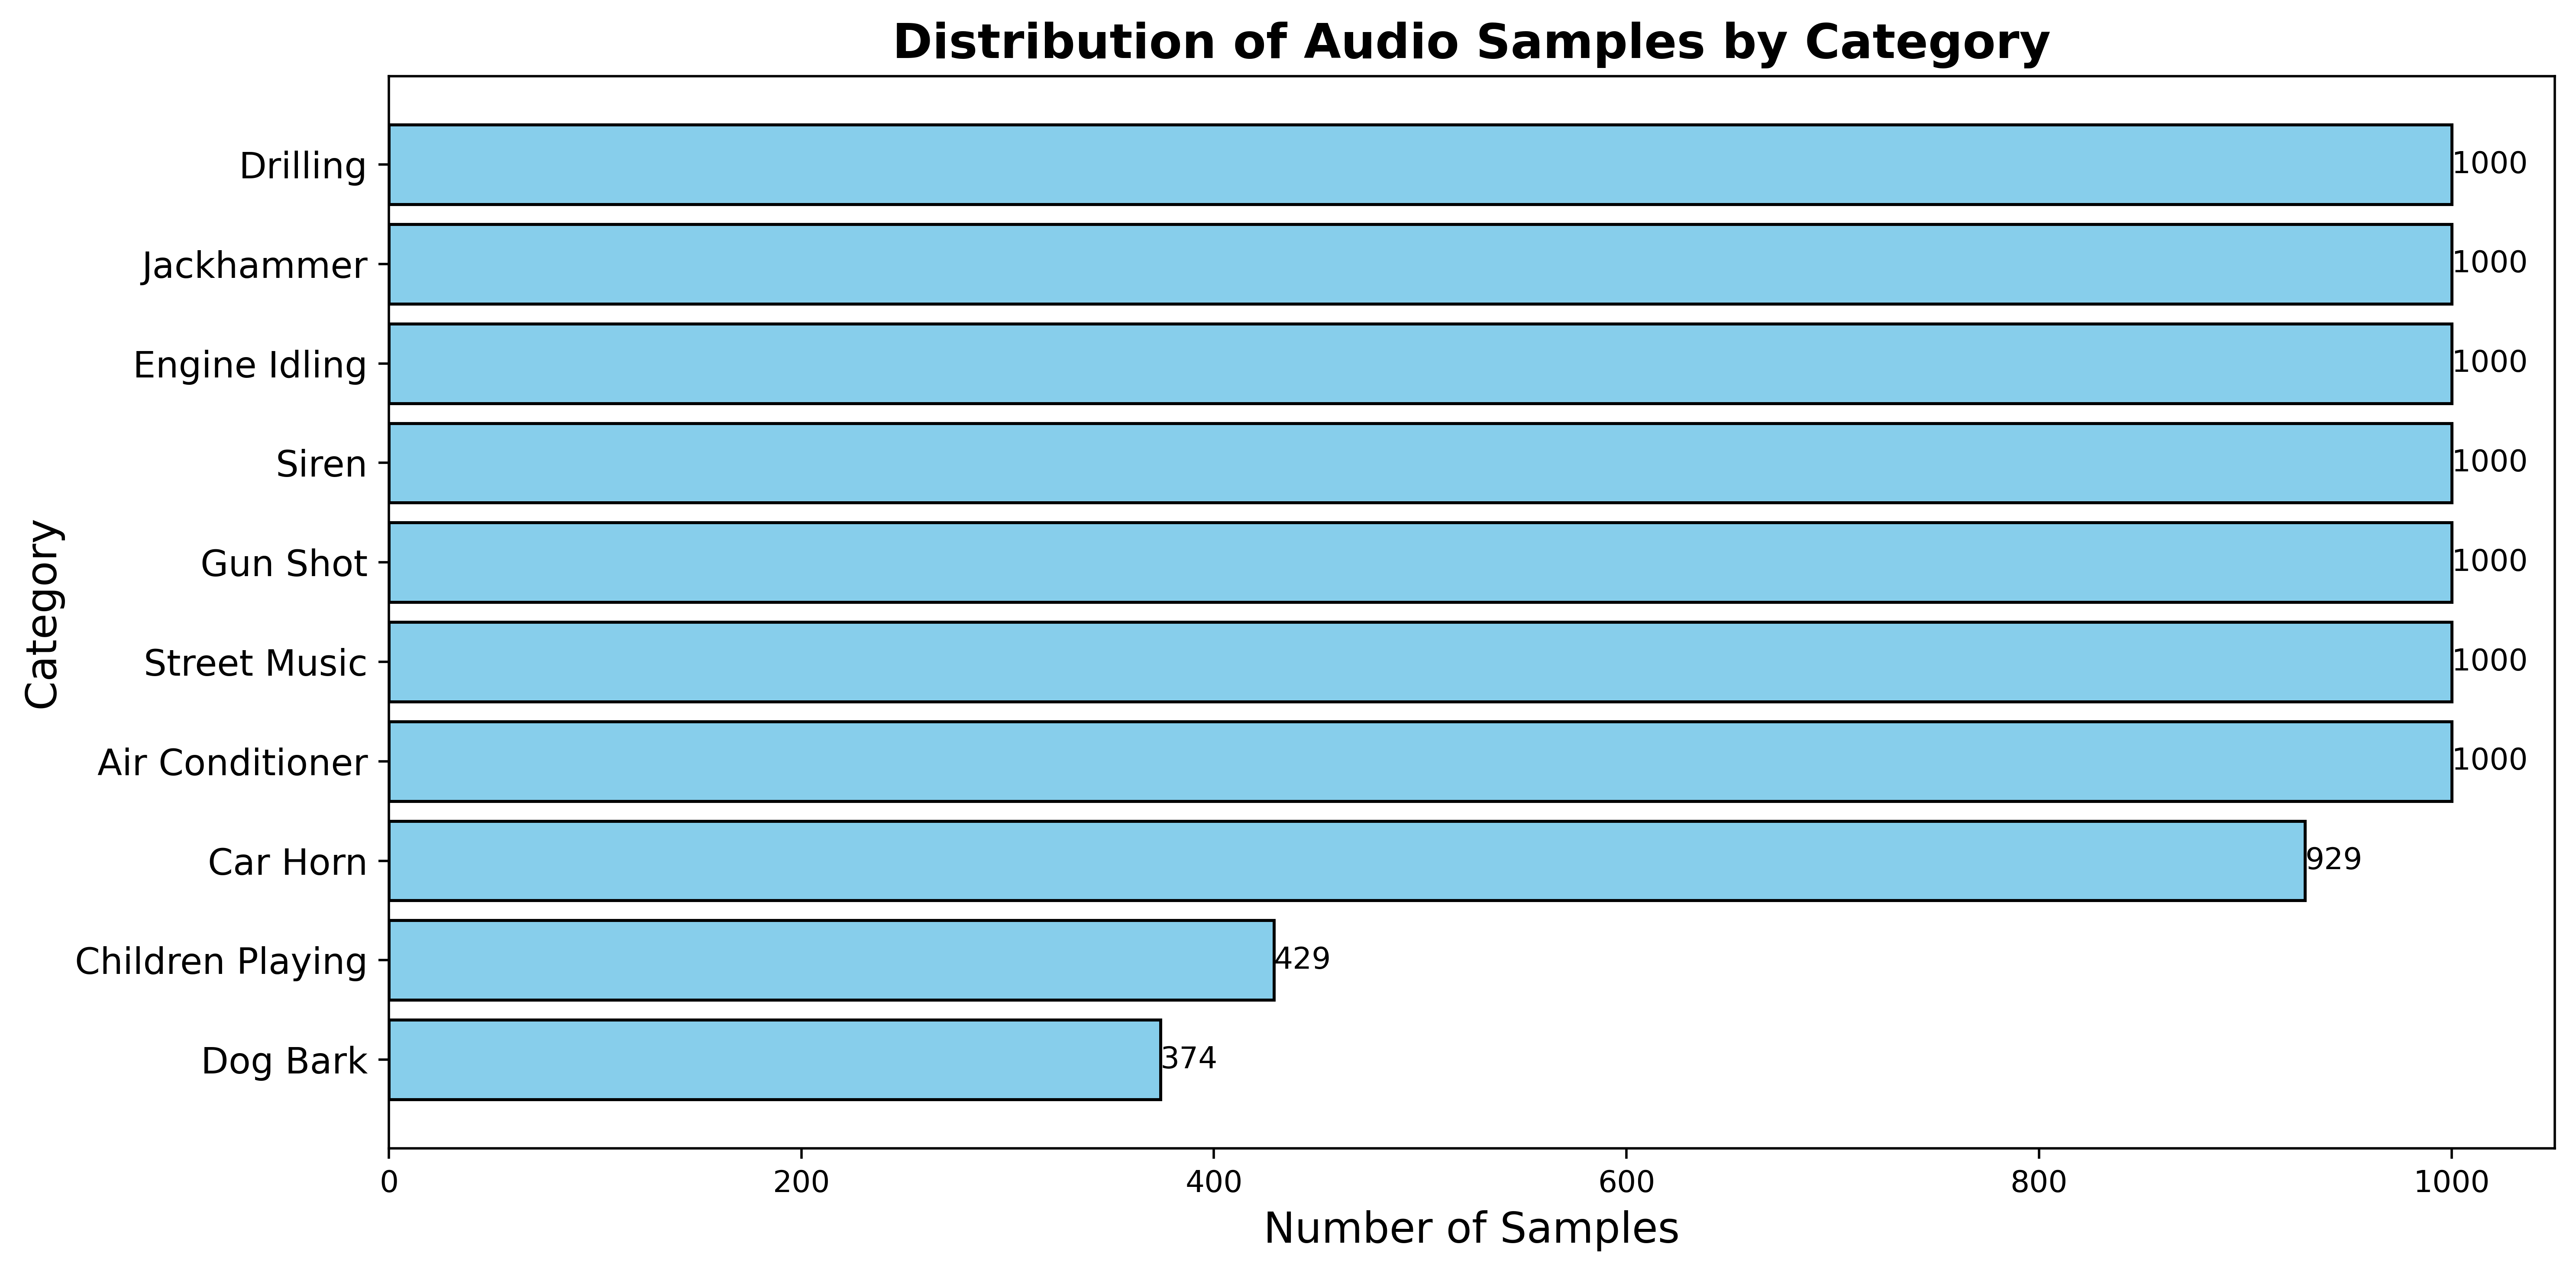

In [5]:
x = meta_data["class"].unique()
y = meta_data["class"].value_counts(ascending=True)
ind = np.arange(len(y))

# Create a figure and axis with a different style
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(ind, y, color='skyblue', edgecolor='black')

# Set the y-ticks and labels
ax.set_yticks(ind)
ax.set_yticklabels(x, fontsize=12)

# Add bar labels with a different font size
ax.bar_label(bars, fontsize=10)

# Set the title and labels with a different font style
plt.title("Distribution of Audio Samples by Category", fontsize=16, fontweight='bold')
plt.xlabel("Number of Samples", fontsize=14)
plt.ylabel("Category", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Set the DPI for high resolution
plt.gcf().set_dpi(500)

# Show the plot
plt.show()

In [6]:
plt.rcParams["figure.figsize"] = (5, 2.5)
plt.rcParams["figure.dpi"] = 200

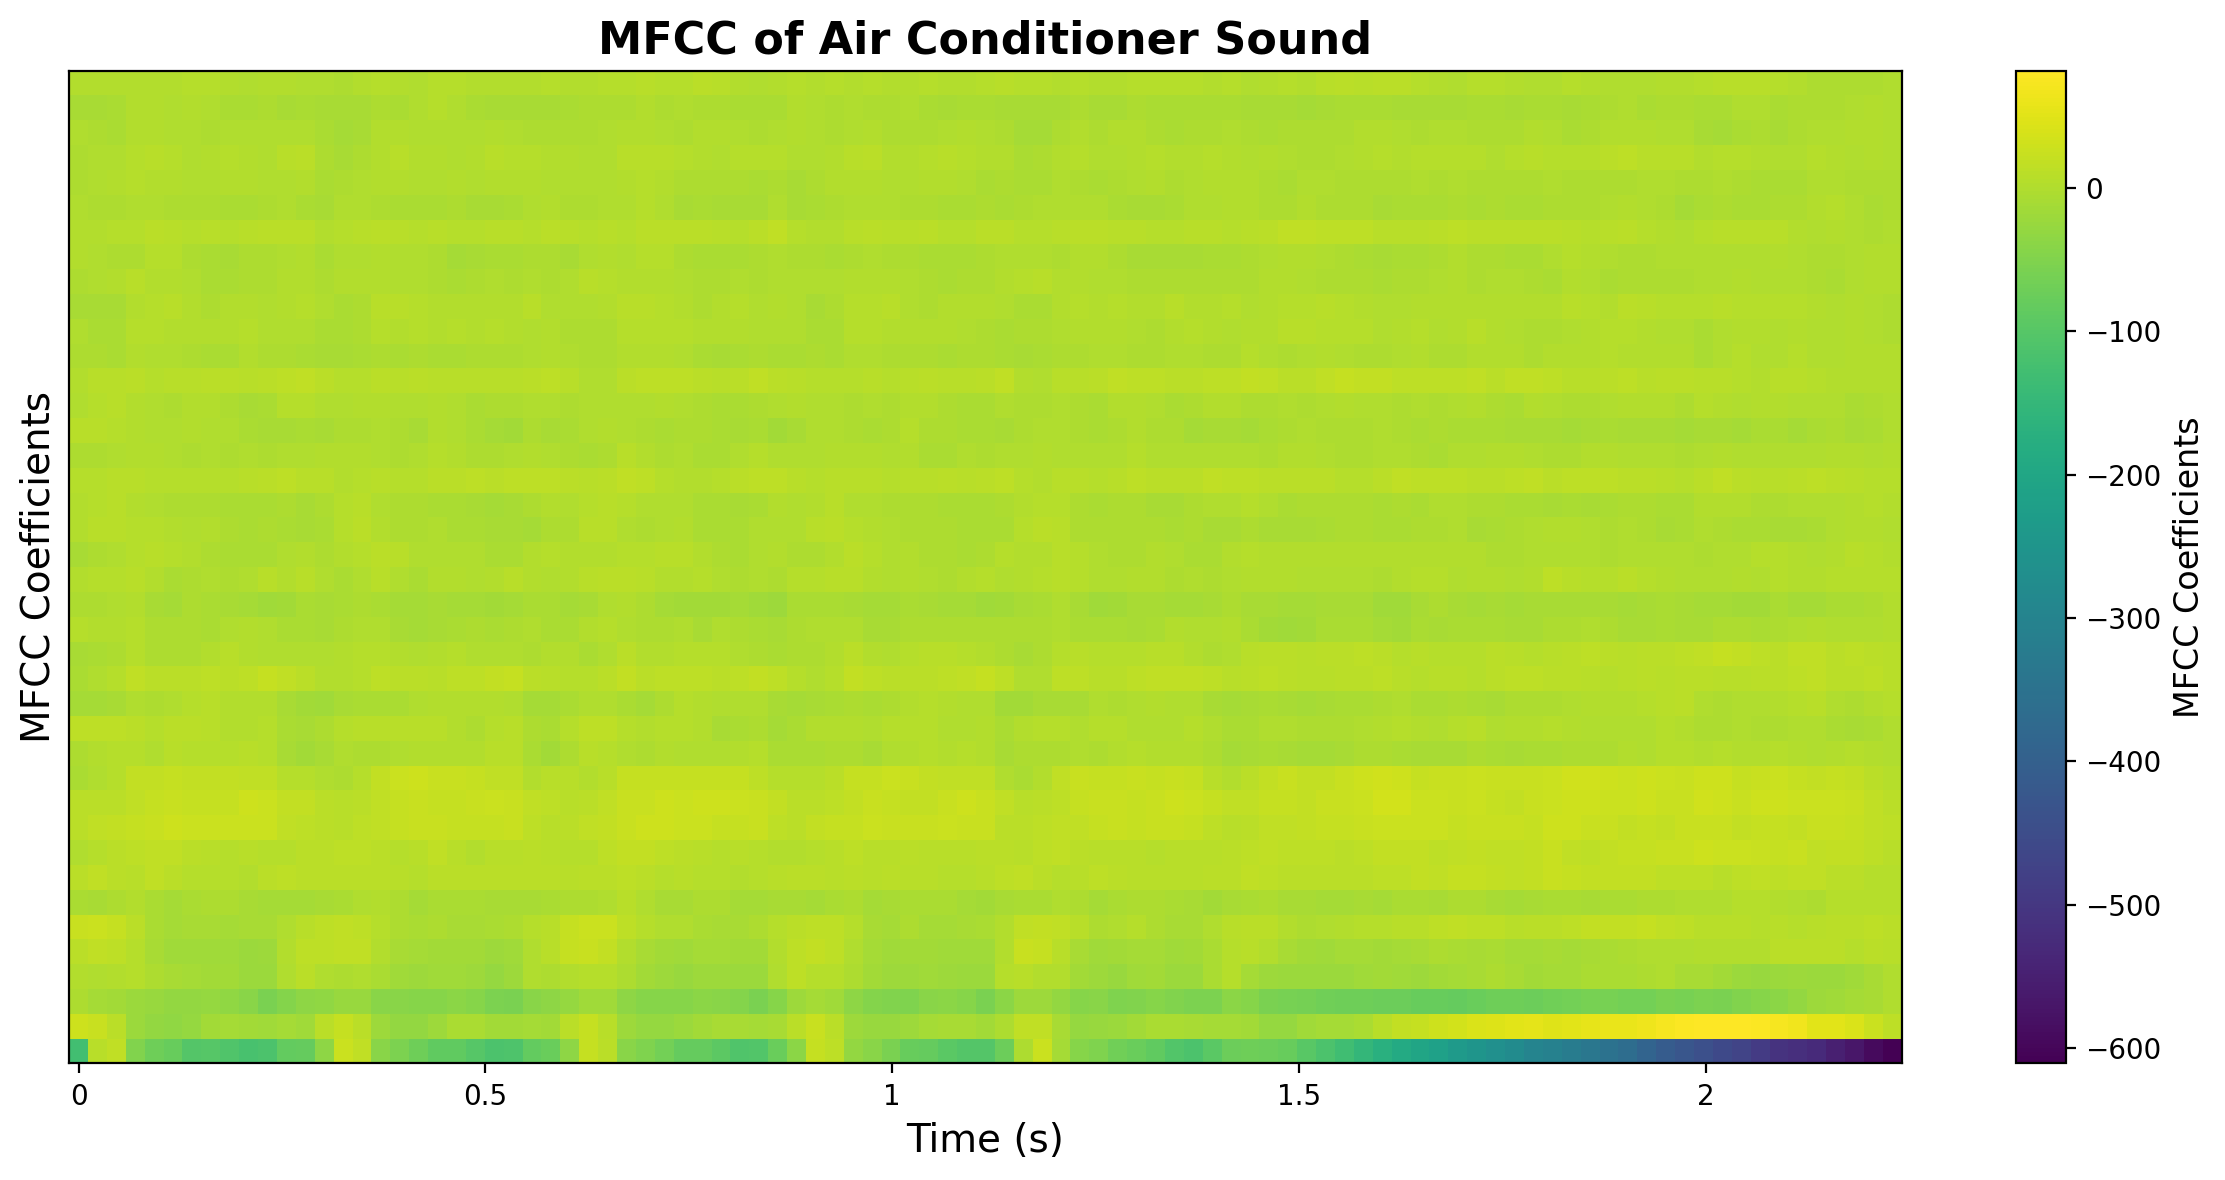

In [7]:
# Load the audio file
audio_path = audio_dataset_path + "fold1/7061-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)

# Create a figure for the MFCC plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis="time", cmap='viridis')

# Add a color bar with a label
cbar = plt.colorbar()
cbar.set_label('MFCC Coefficients', fontsize=12)

# Set the title and adjust layout
plt.title("MFCC of Air Conditioner Sound", fontsize=16, fontweight='bold')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("MFCC Coefficients", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

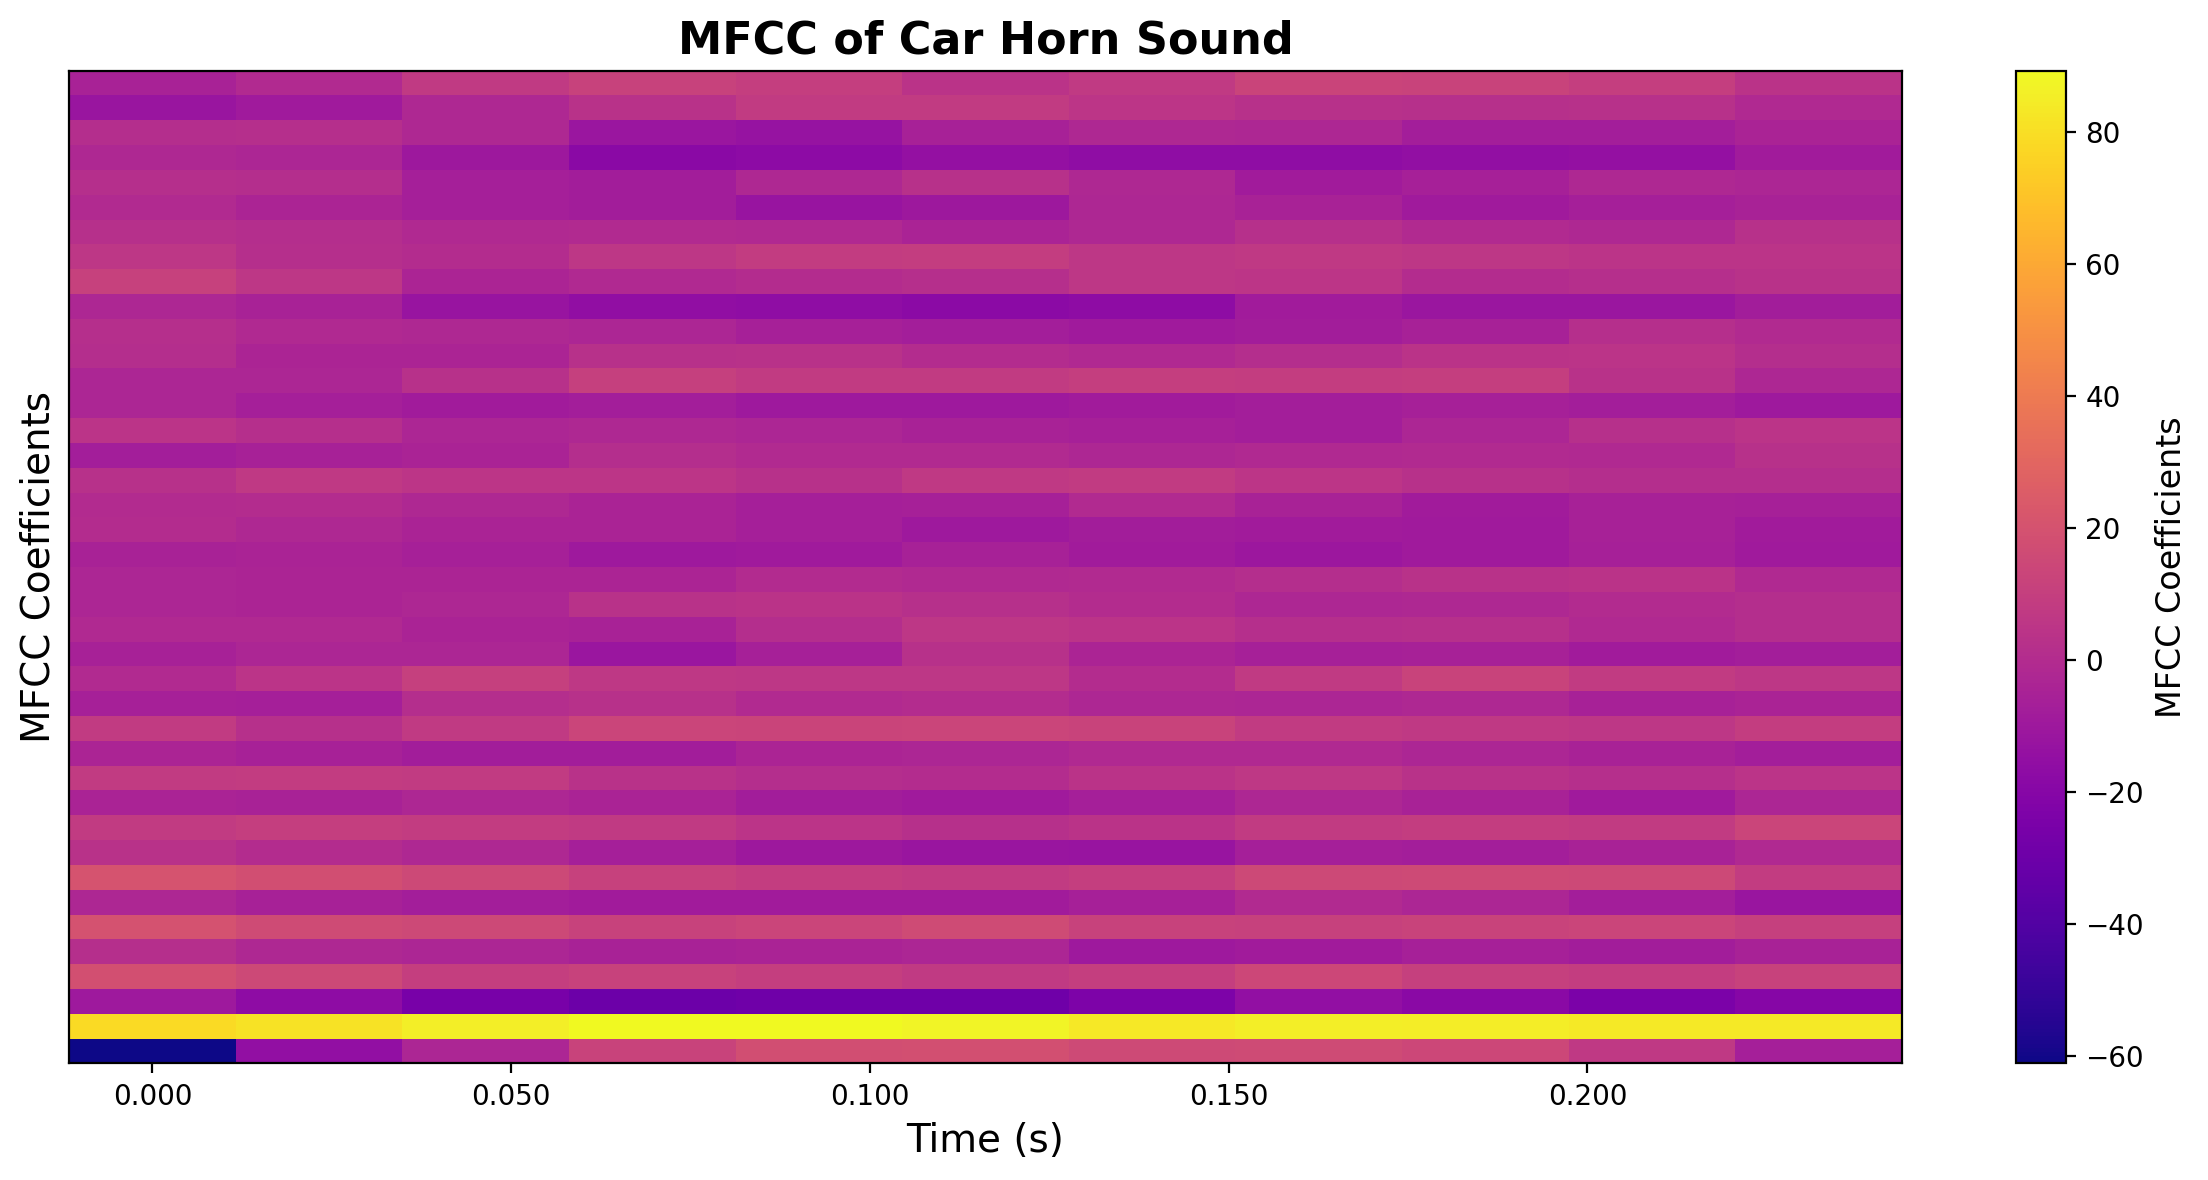

In [8]:
# Load the audio file
audio_path = audio_dataset_path + "fold1/156194-1-0-0.wav"
(xf, sr) = librosa.load(audio_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)

# Create a figure for the MFCC plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis="time", cmap='plasma')

# Add a color bar with a label
cbar = plt.colorbar()
cbar.set_label('MFCC Coefficients', fontsize=12)

# Set the title and adjust layout
plt.title("MFCC of Car Horn Sound", fontsize=16, fontweight='bold')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("MFCC Coefficients", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

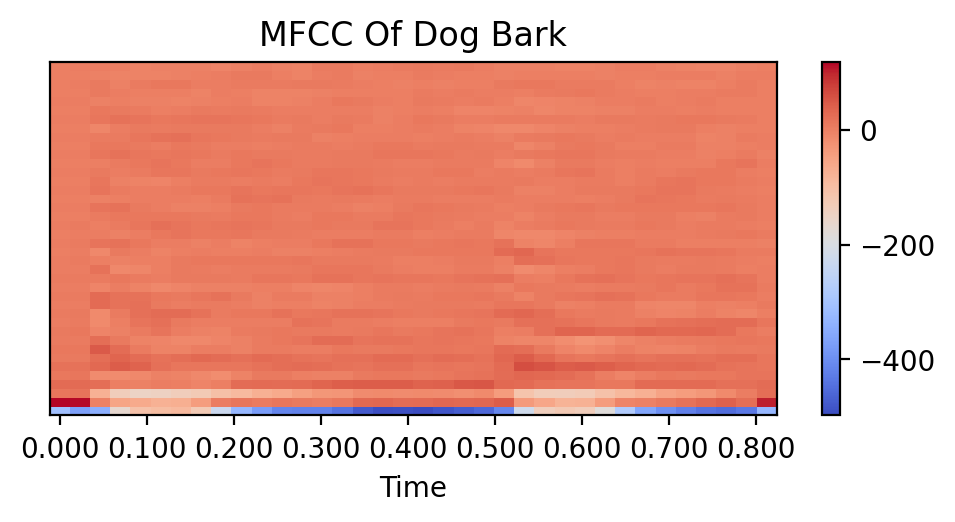

In [9]:
audio_path = audio_dataset_path + "fold1/9031-3-4-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Dog Bark")
plt.show

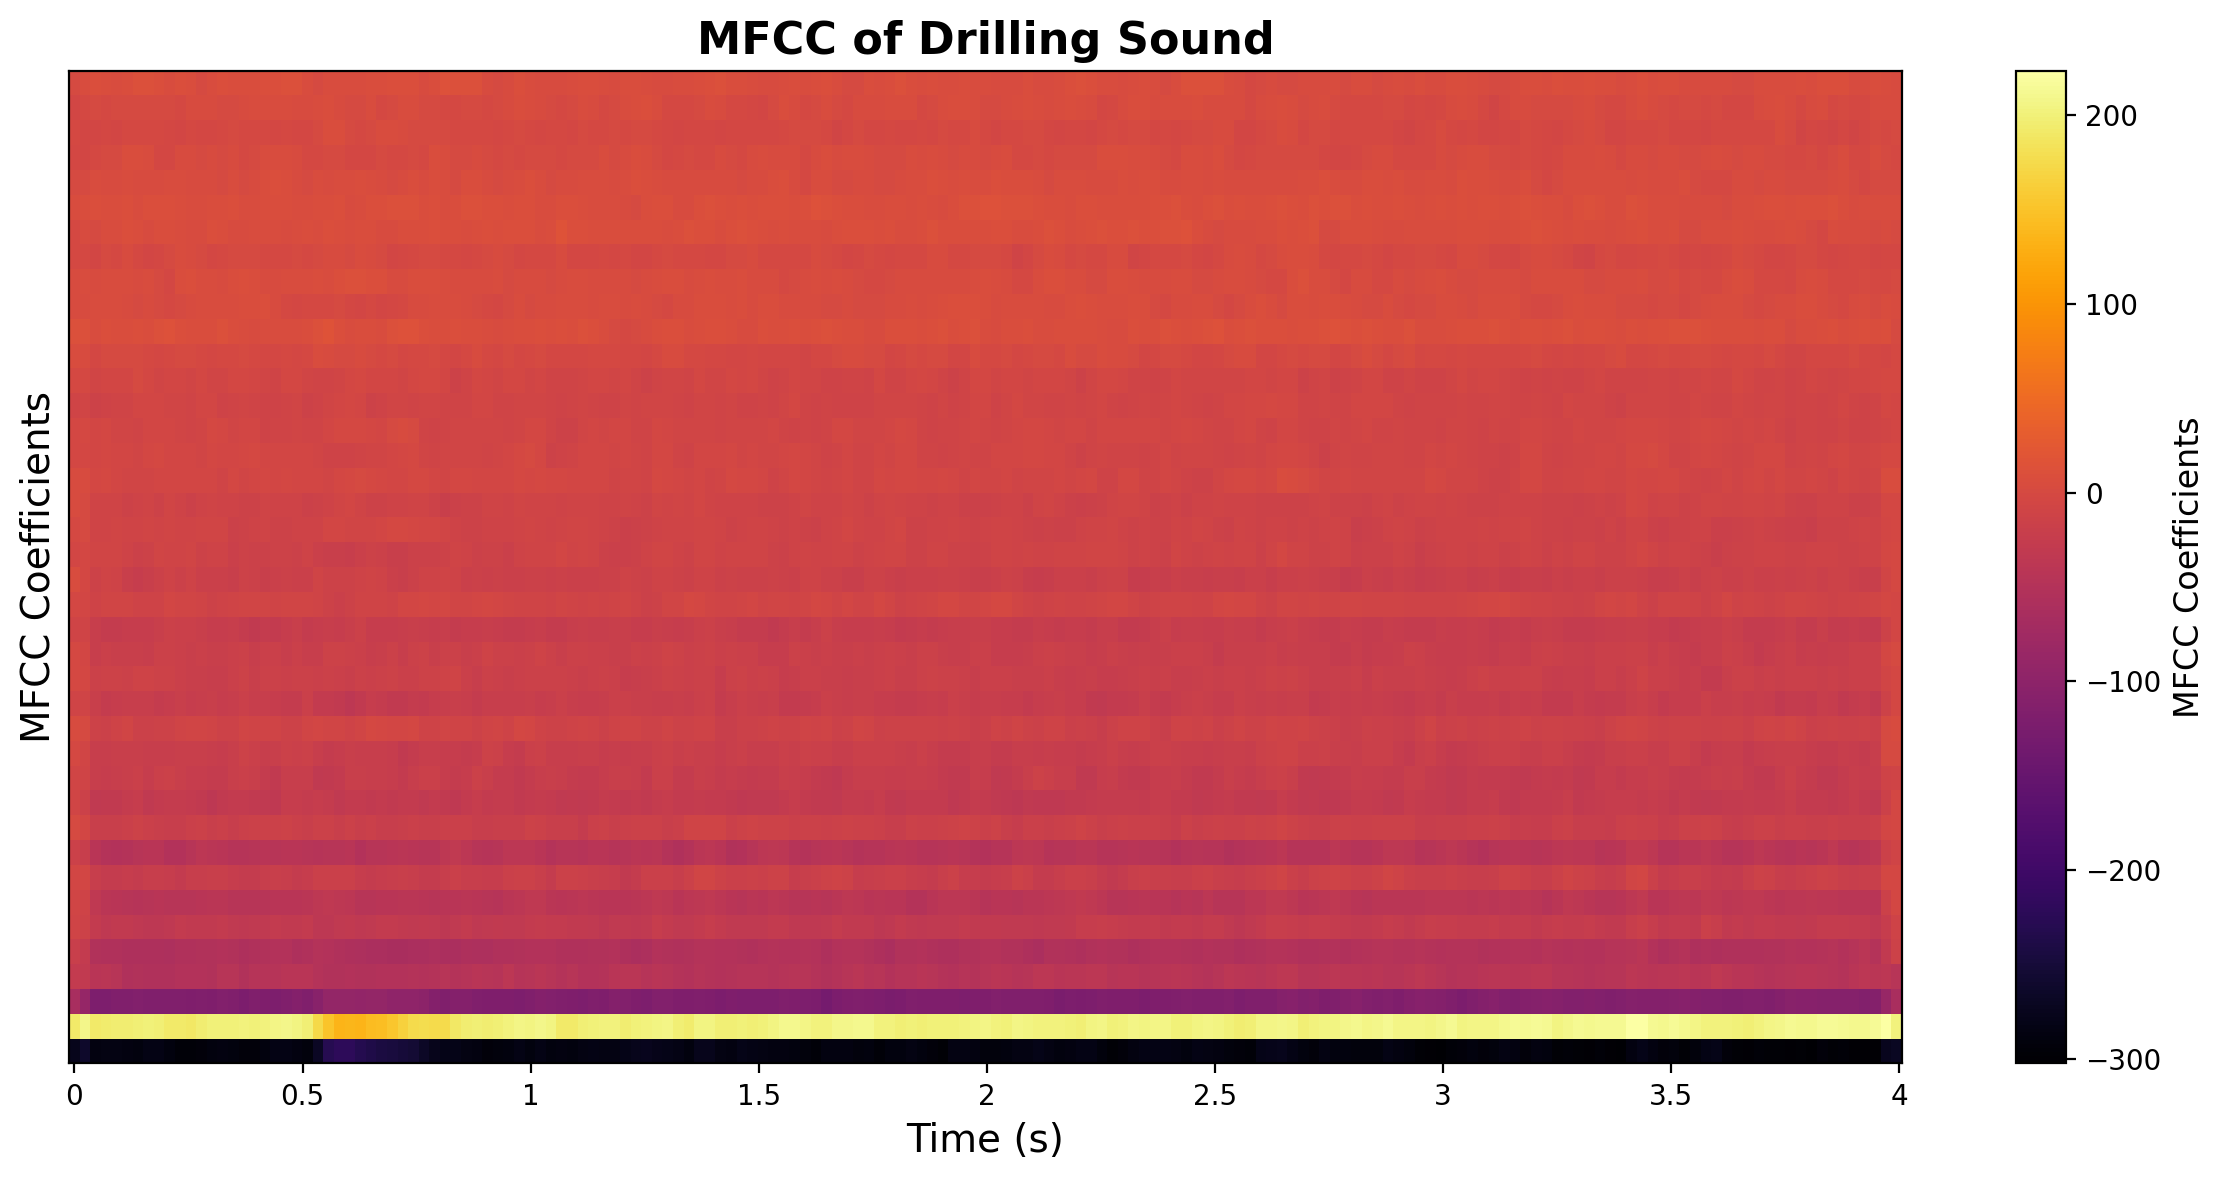

In [10]:
# Load the audio file
audio_path = audio_dataset_path + "fold1/176787-5-0-24.wav"
(xf, sr) = librosa.load(audio_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)

# Create a figure for the MFCC plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis="time", cmap='inferno')

# Add a color bar with a label
cbar = plt.colorbar()
cbar.set_label('MFCC Coefficients', fontsize=12)

# Set the title and adjust layout
plt.title("MFCC of Drilling Sound", fontsize=16, fontweight='bold')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("MFCC Coefficients", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

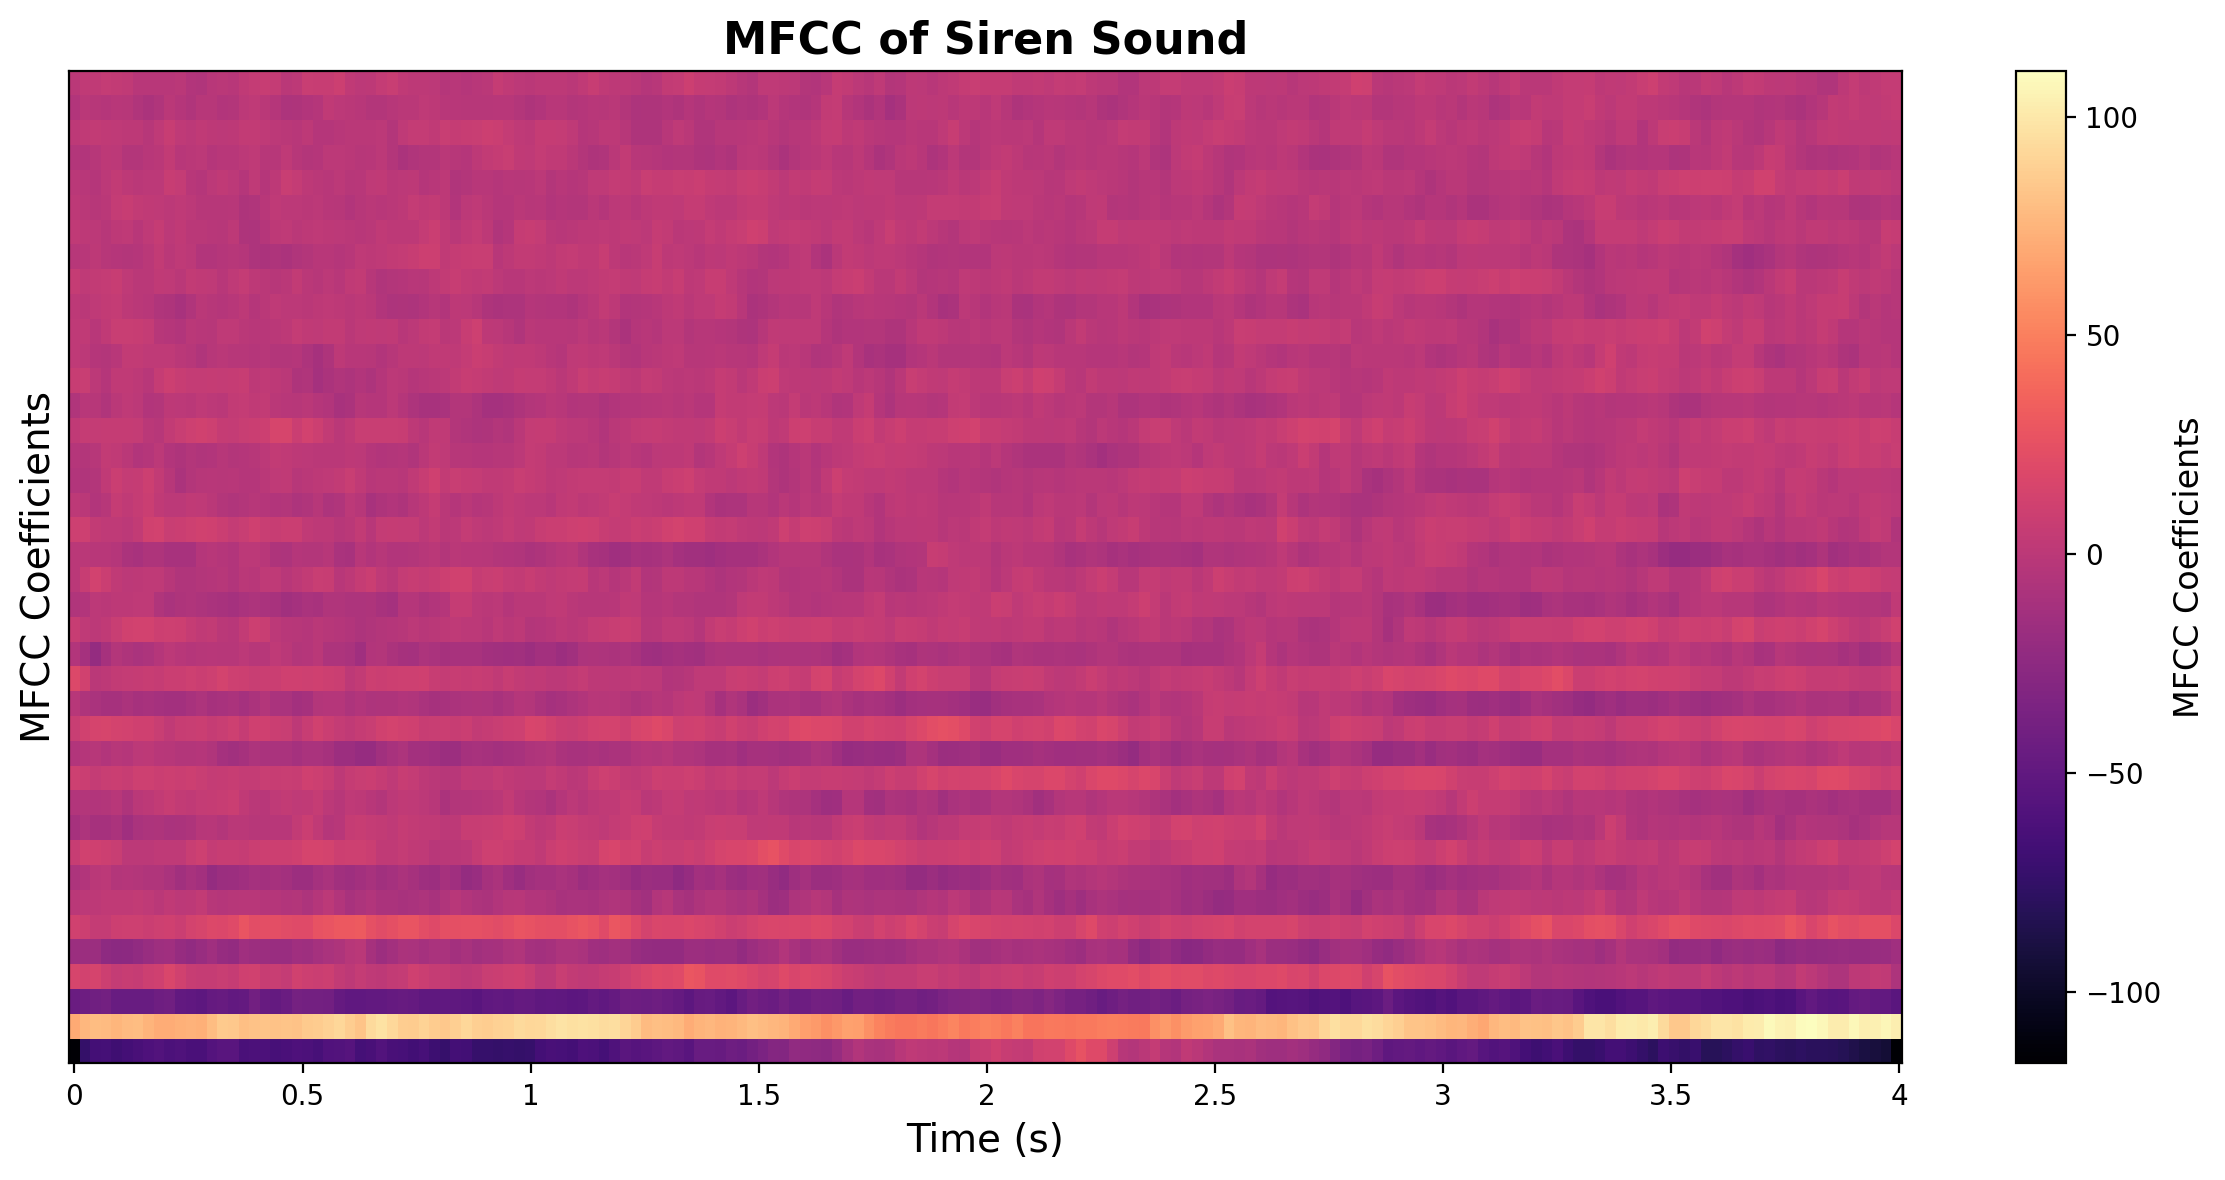

In [11]:
# Load the audio file
audio_path = audio_dataset_path + "fold1/106905-8-0-0.wav"
(xf, sr) = librosa.load(audio_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)

# Create a figure for the MFCC plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis="time", cmap='magma')

# Add a color bar with a label
cbar = plt.colorbar()
cbar.set_label('MFCC Coefficients', fontsize=12)

# Set the title and adjust layout
plt.title("MFCC of Siren Sound", fontsize=16, fontweight='bold')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("MFCC Coefficients", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

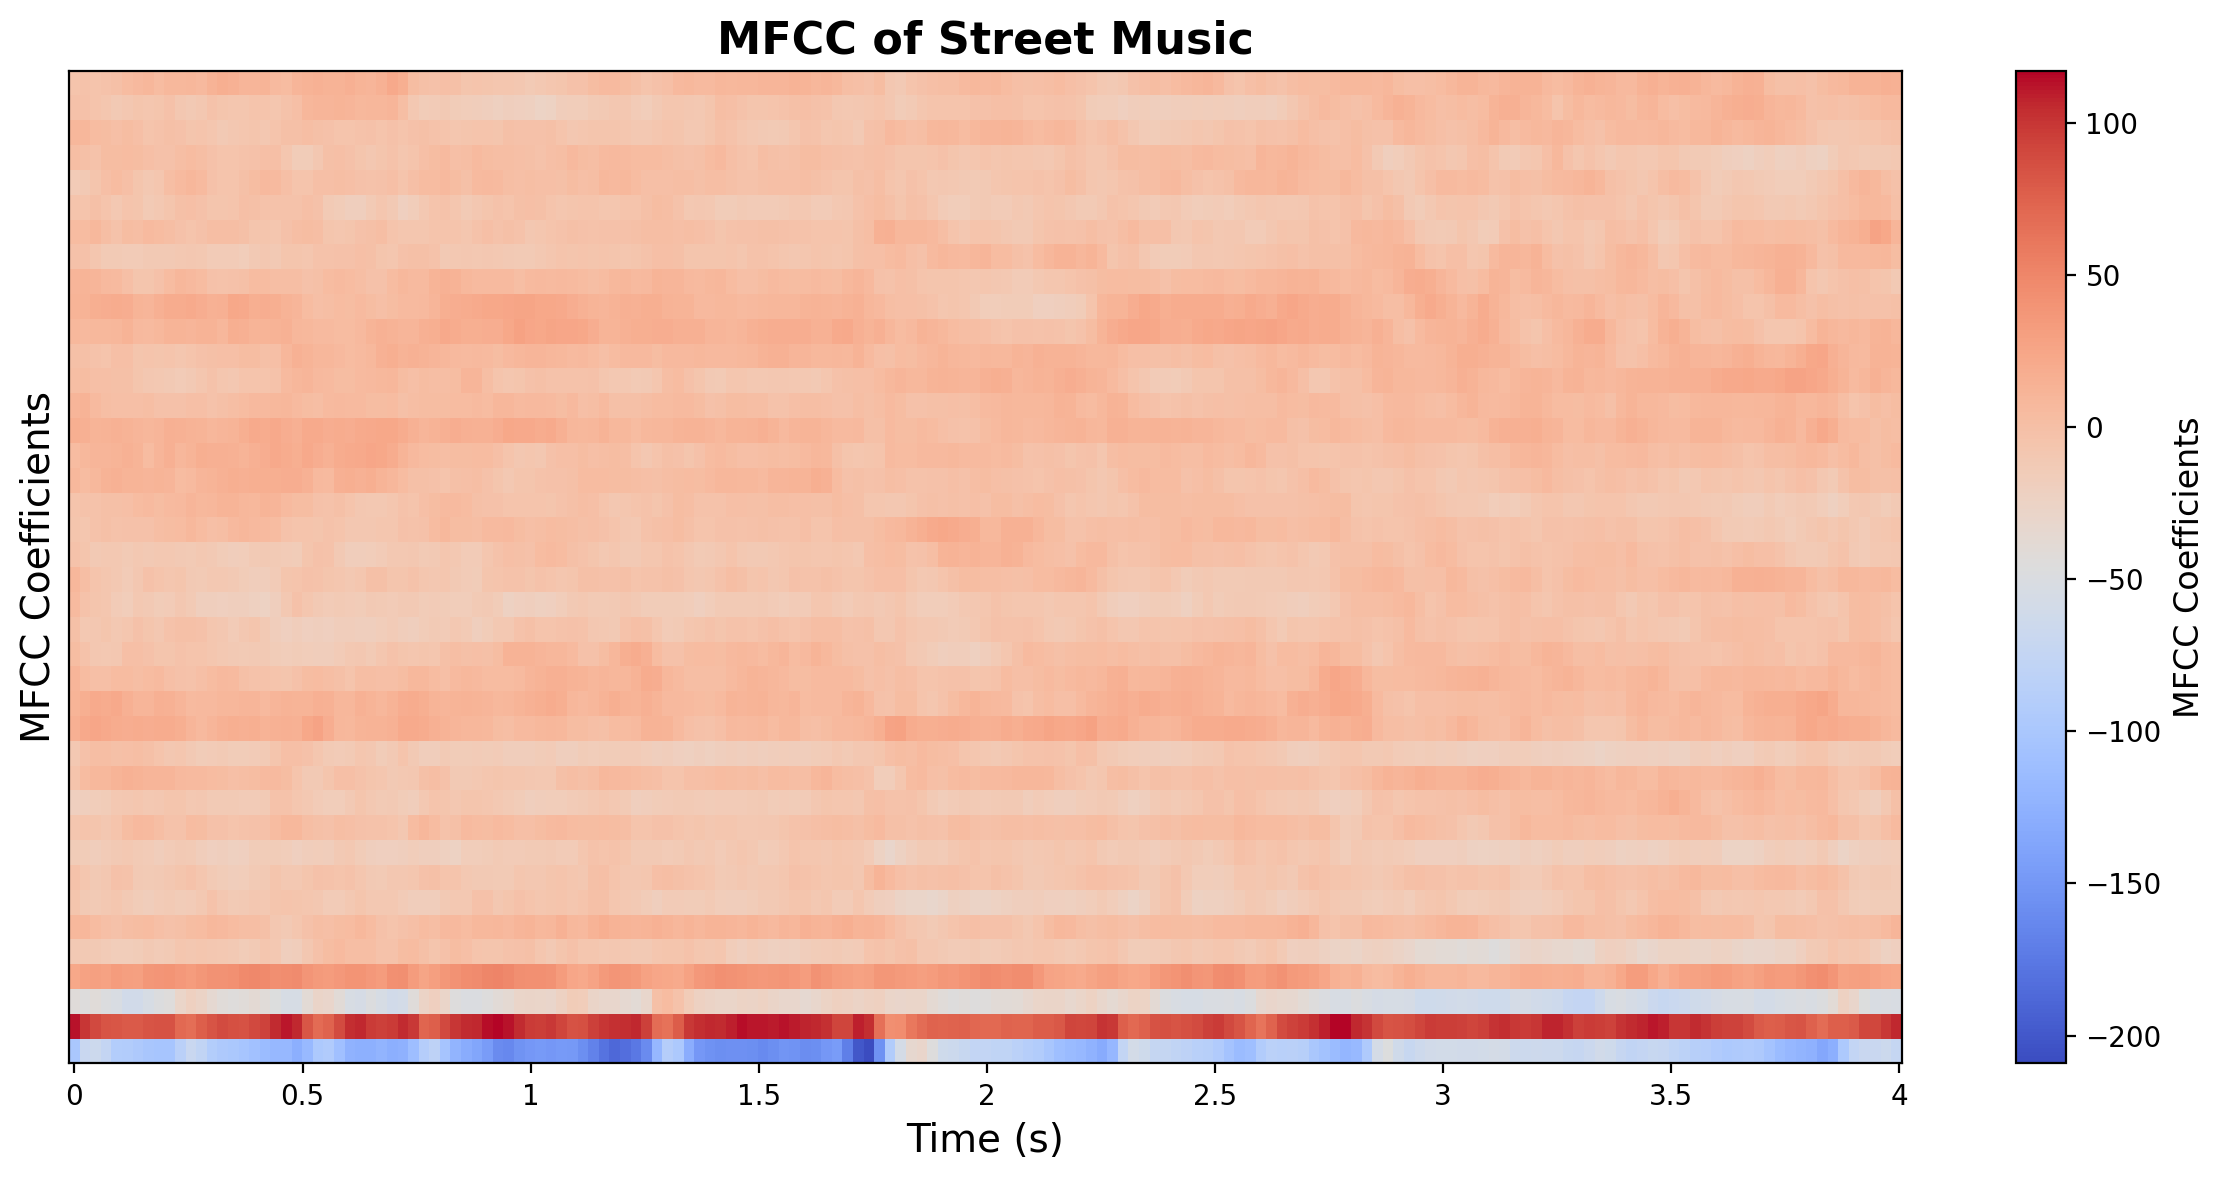

In [12]:
# Load the audio file
audio_path = audio_dataset_path + "fold1/108041-9-0-11.wav"
(xf, sr) = librosa.load(audio_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)

# Create a figure for the MFCC plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis="time", cmap='coolwarm')

# Add a color bar with a label
cbar = plt.colorbar()
cbar.set_label('MFCC Coefficients', fontsize=12)

# Set the title and adjust layout
plt.title("MFCC of Street Music", fontsize=16, fontweight='bold')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("MFCC Coefficients", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

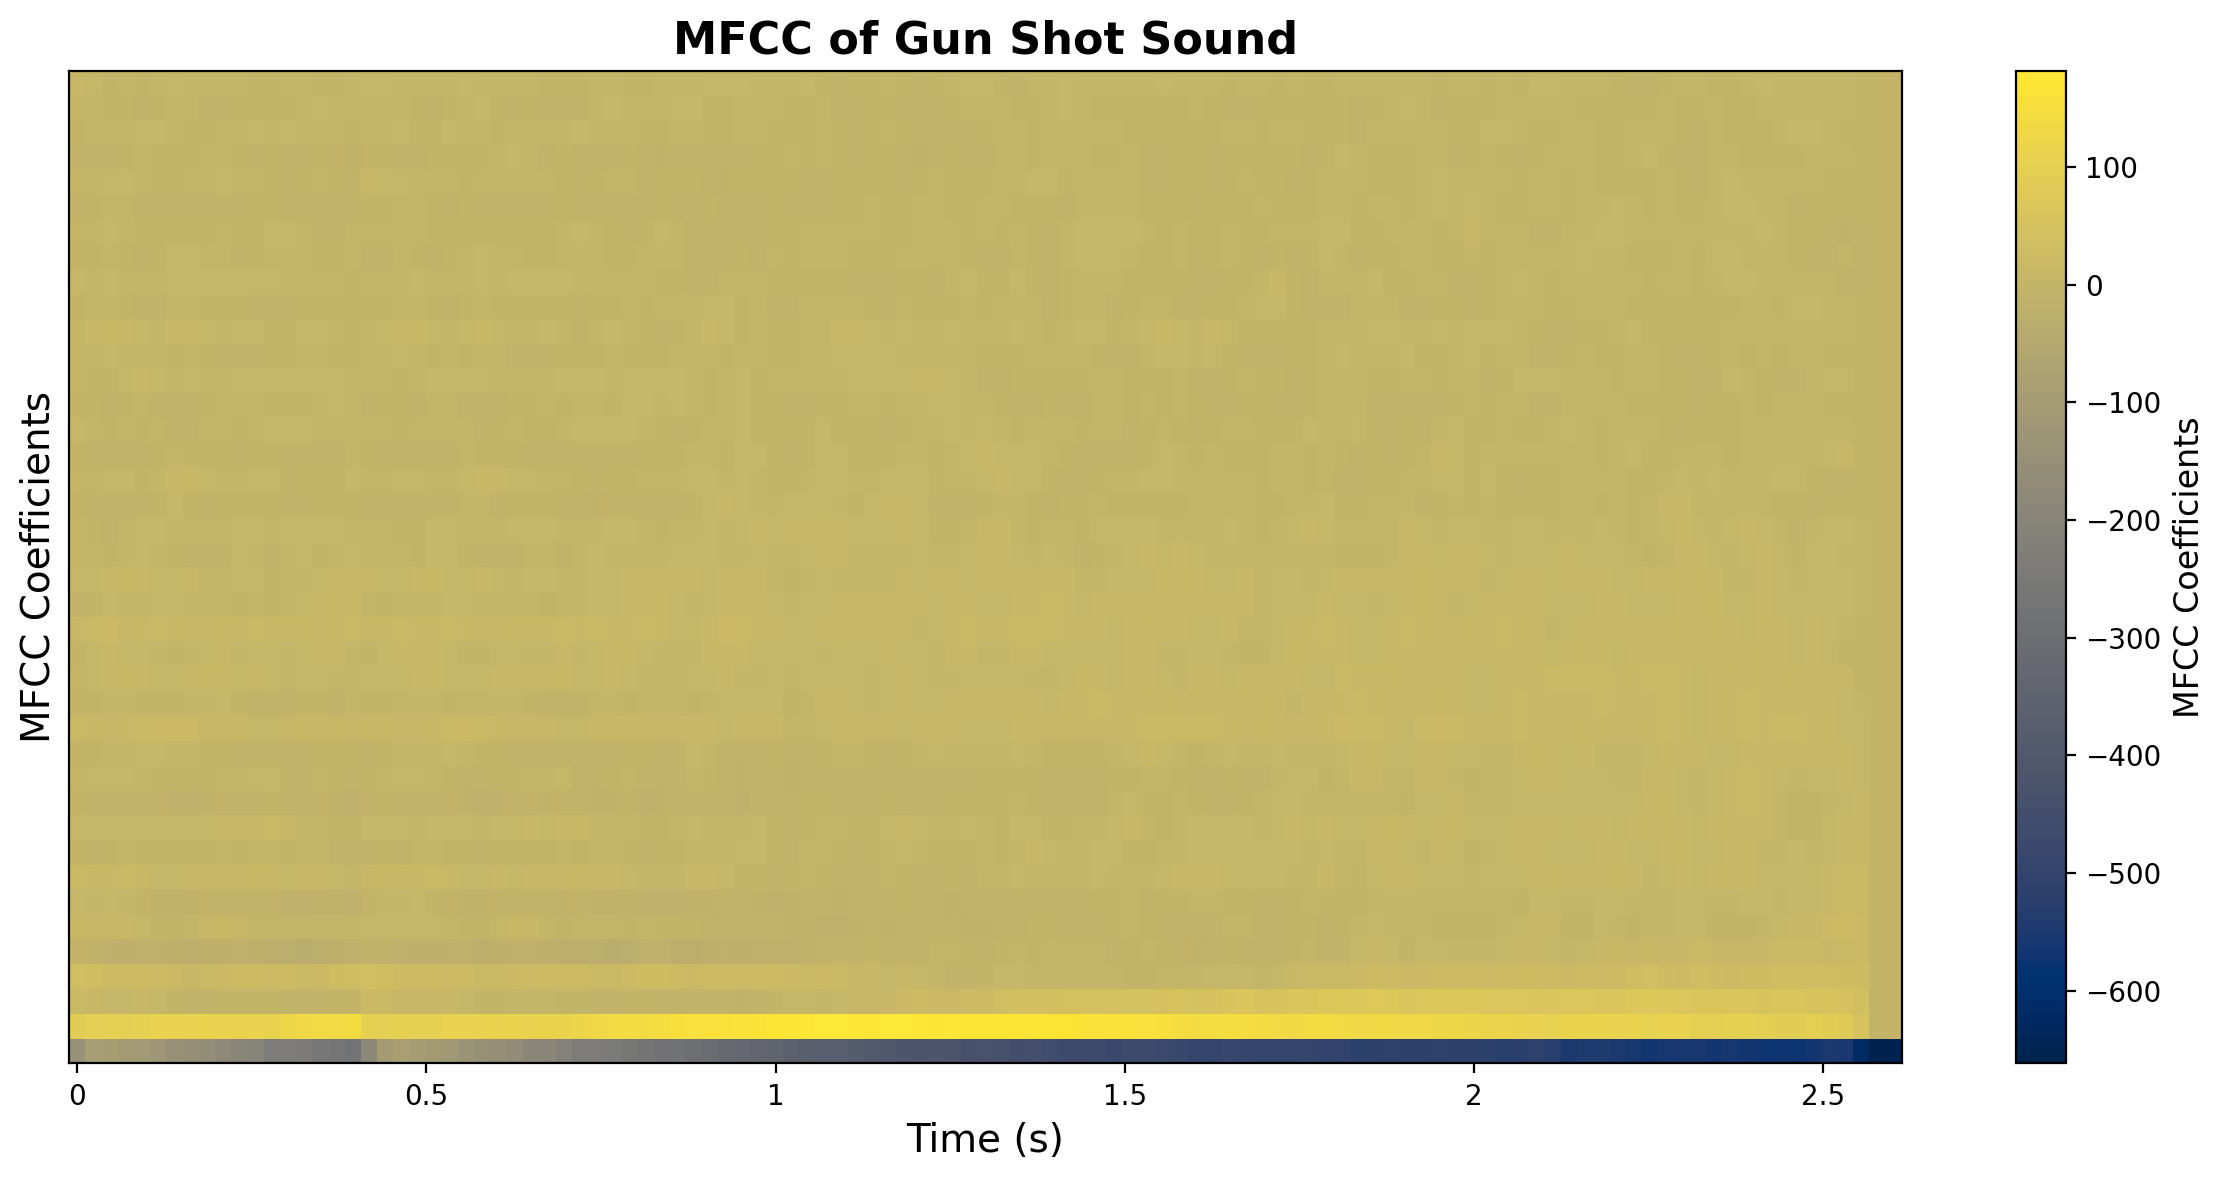

In [13]:
# Load the audio file
audio_path = audio_dataset_path + "fold1/102305-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)

# Create a figure for the MFCC plot
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis="time", cmap='cividis')

# Add a color bar with a label
cbar = plt.colorbar()
cbar.set_label('MFCC Coefficients', fontsize=12)

# Set the title and adjust layout
plt.title("MFCC of Gun Shot Sound", fontsize=16, fontweight='bold')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("MFCC Coefficients", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# List to hold all the extracted features and their corresponding labels
extracted = []

# Iterate through each row in the metadata DataFrame
for index_num, row in tqdm(meta_data.iterrows(), total=meta_data.shape[0]):
    # Construct the file path for the audio file
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]) + "/",
        str(row["slice_file_name"]),
    )
    
    # Get the file label (class)
    final_class_labels = row["class"]
    
    # Load the audio file
    audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    
    # Extract MFCC features
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    
    # Feature scaling: take the mean of the MFCCs across time
    scaled_feature = np.mean(feature.T, axis=0)
    
    # Store the scaled features and their corresponding label in the list
    extracted.append([scaled_feature, final_class_labels])

# Convert the extracted features into a DataFrame for easier manipulation later
extracted_df = pd.DataFrame(extracted, columns=['features', 'label'])

100%|███████████████████████████████████████| 8732/8732 [04:37<00:00, 31.44it/s]


In [15]:
# Create a new DataFrame from the extracted features and labels
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])

# Storing the DataFrame to a pickle file for further processing
extracted_df.to_pickle("extracted_df.pkl")

# Display the first few rows of the DataFrame
extracted_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",Dog Bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",Children Playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",Children Playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",Children Playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",Children Playing


In [16]:
# Create a new DataFrame from the extracted features and labels
final = pd.DataFrame(extracted, columns=["feature", "class"])

# Convert the features and labels into NumPy arrays
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())

In [20]:
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
y = to_categorical(le.fit_transform(y))

In [22]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


In [24]:
# Assuming y is defined and contains the one-hot encoded labels
num_labels = y.shape[1]  # Number of output classes

# Initialize the Sequential model
ANN_Model = Sequential()

# Input layer with Batch Normalization
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(BatchNormalization())
ANN_Model.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Hidden layers with Batch Normalization and Dropout
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(BatchNormalization())
ANN_Model.add(Dropout(0.3))

ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(BatchNormalization())
ANN_Model.add(Dropout(0.3))

ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(BatchNormalization())
ANN_Model.add(Dropout(0.3))

ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(BatchNormalization())
ANN_Model.add(Dropout(0.3))

ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(BatchNormalization())
ANN_Model.add(Dropout(0.3))

# Output layer
ANN_Model.add(Dense(num_labels, activation="softmax"))

# Compile the model
ANN_Model.compile(
    optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

# Training parameters
num_epochs = 250
num_batch_size = 32

# Start timing the training process
t0 = time.time()

# Train the model
ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

# Save the trained model
ANN_Model.save("Model1.h5")
print("ANN Model Saved")

# Record the training history
train_hist_m1 = pd.DataFrame(ANN_Results.history)

# Calculate and print the training time
train_m1 = round(time.time() - t0, 3)
print(f"Training Time: {train_m1} seconds")

2025-04-02 16:11:53.872294: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-02 16:11:53.872596: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-02 16:11:53.872619: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1743590513.873005 2164632 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1743590513.873342 2164632 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/250


2025-04-02 16:11:54.774200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.2436 - loss: 2.4312 - val_accuracy: 0.5363 - val_loss: 1.3442
Epoch 2/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4563 - loss: 1.5956 - val_accuracy: 0.6445 - val_loss: 1.0527
Epoch 3/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5573 - loss: 1.3453 - val_accuracy: 0.7161 - val_loss: 0.8499
Epoch 4/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6430 - loss: 1.0986 - val_accuracy: 0.7418 - val_loss: 0.8134
Epoch 5/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6638 - loss: 1.0217 - val_accuracy: 0.7922 - val_loss: 0.6782
Epoch 6/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7099 - loss: 0.9216 - val_accuracy: 0.7905 - val_loss: 0.6512
Epoch 7/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7356 - loss: 0.8566 - val_accuracy: 0.8151 - val_loss: 0.5847
Epoch 8/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7323 - loss: 0.8285 - val_accuracy

ANN Model Saved
Training Time: 1364.879 seconds


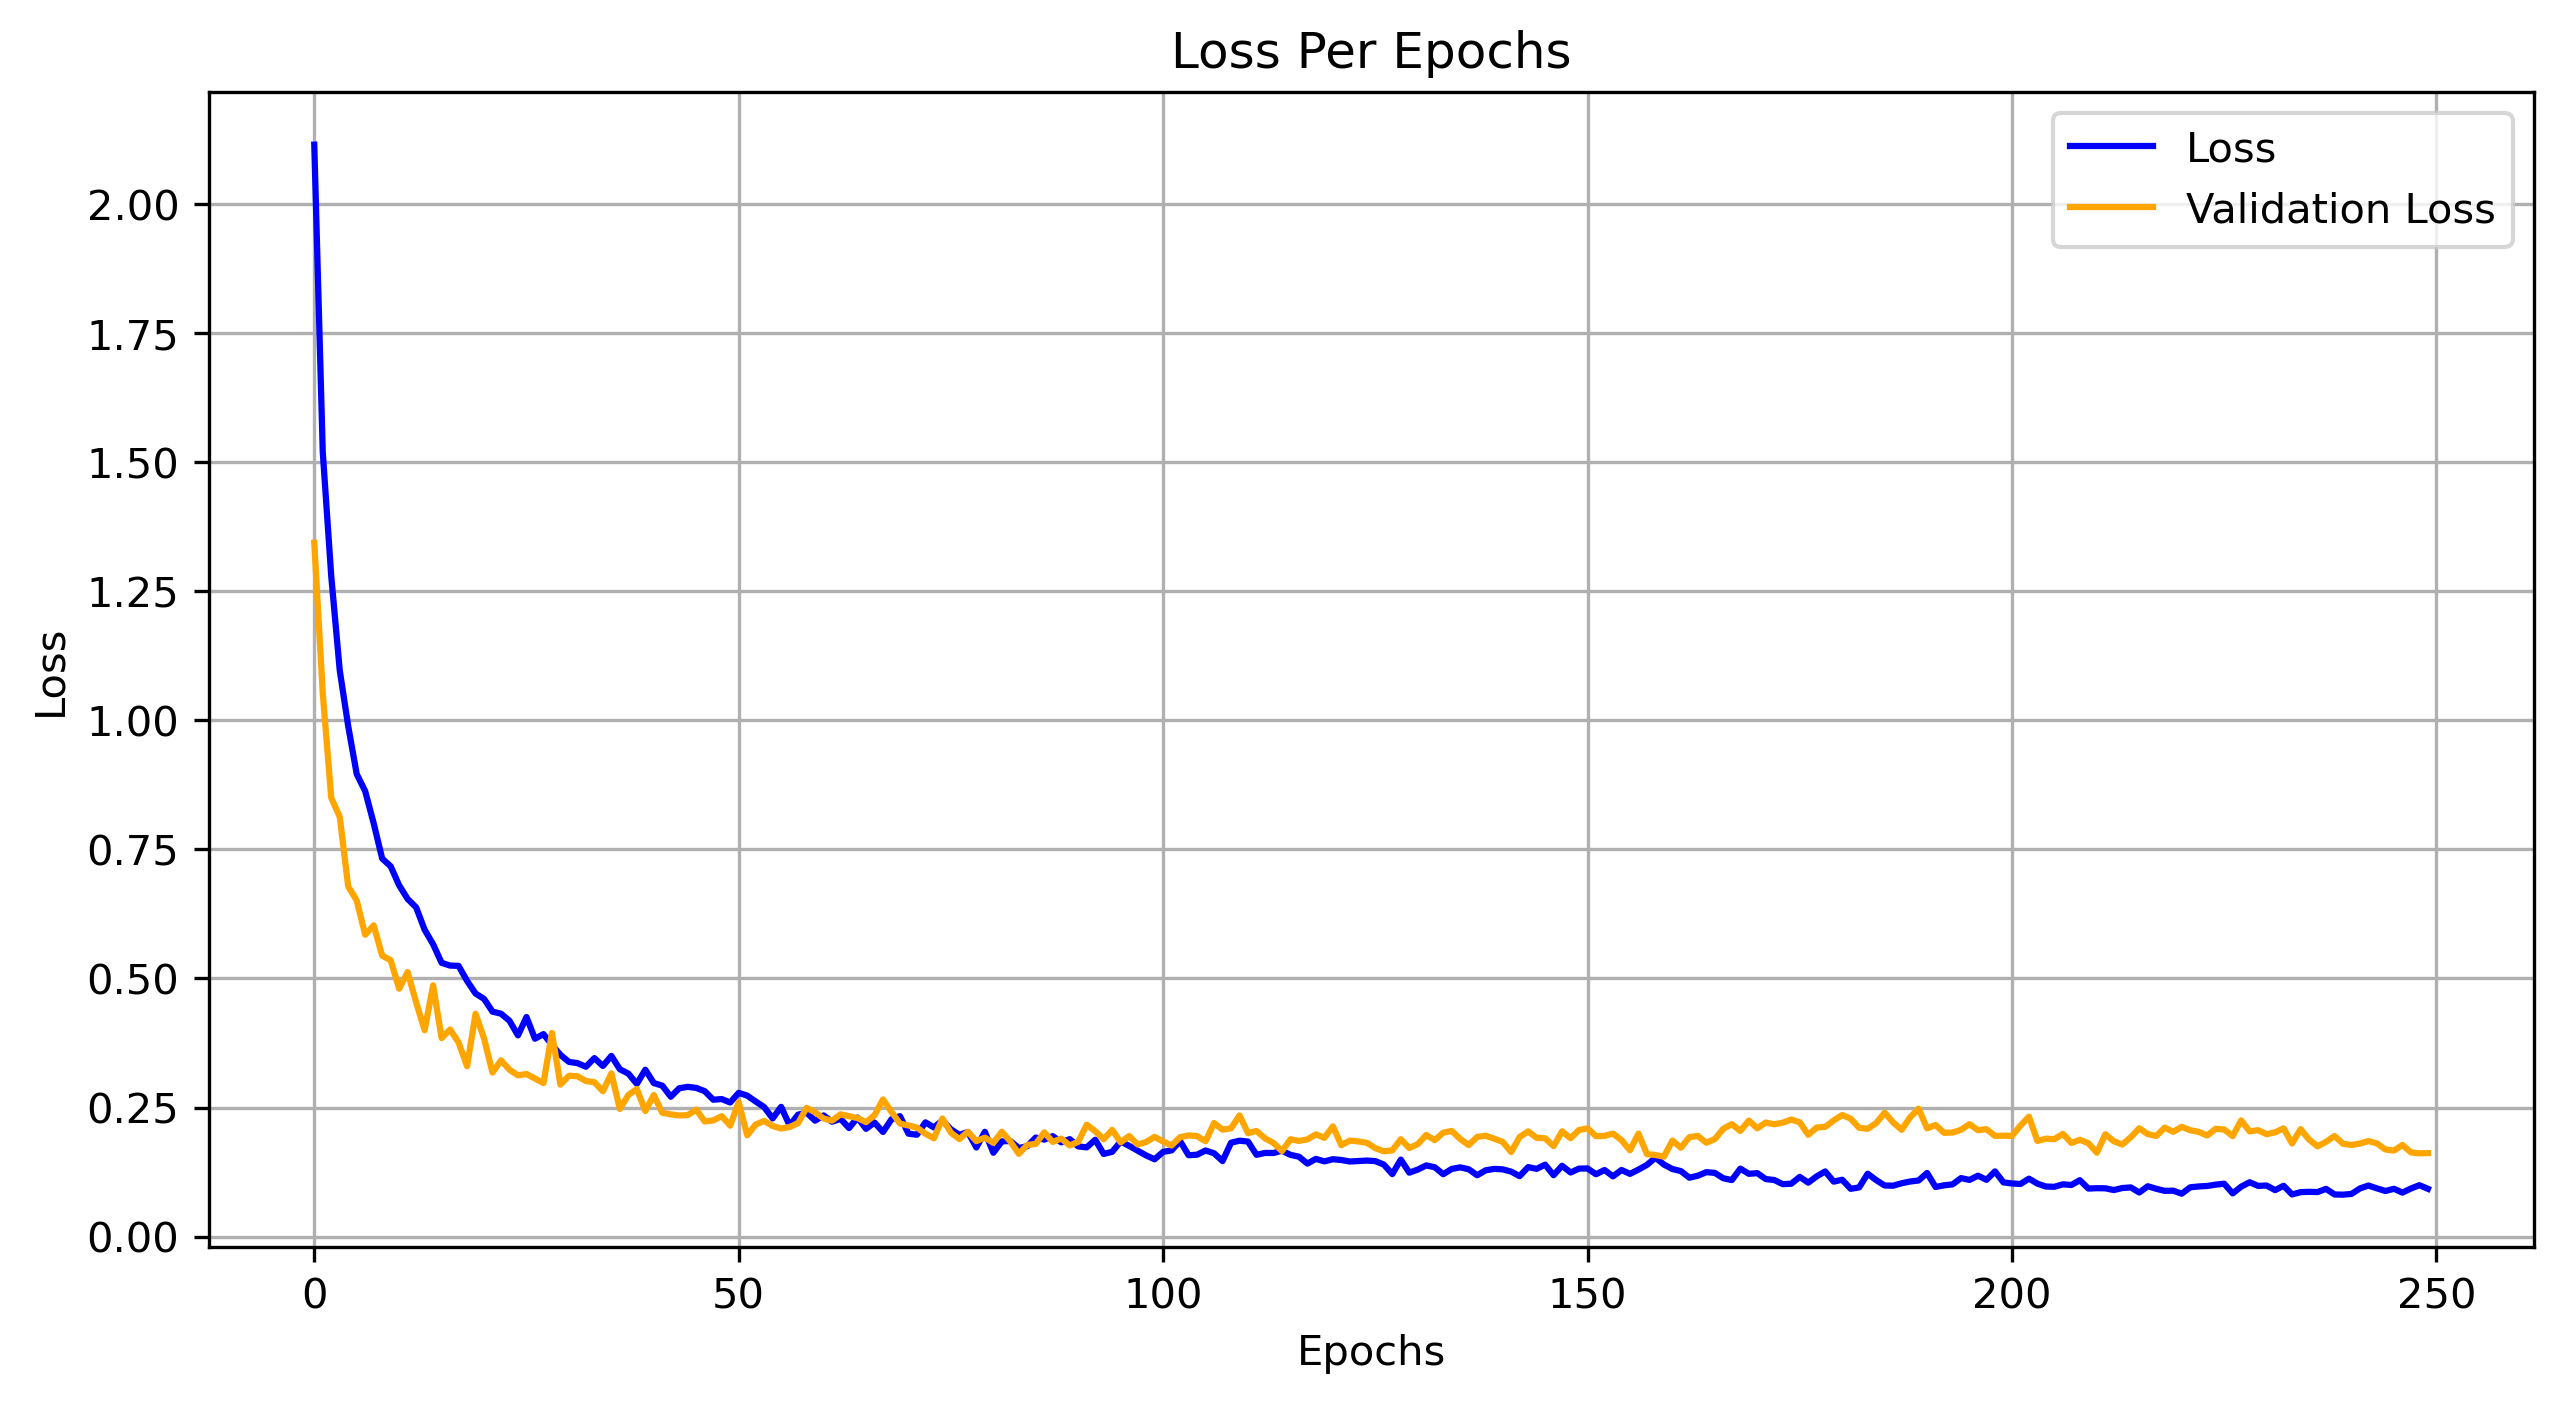

In [26]:
# Create a figure for the loss plot
plt.figure(figsize=(10, 5), dpi=300)

# Plot training and validation loss
plt.plot(train_hist_m1['loss'], label='Loss', color='blue')
plt.plot(train_hist_m1['val_loss'], label='Validation Loss', color='orange')

# Add legend to the plot
plt.legend()

# Set the title and labels
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Optional: Add a grid for better readability
plt.grid()

# Display the plot
plt.show()

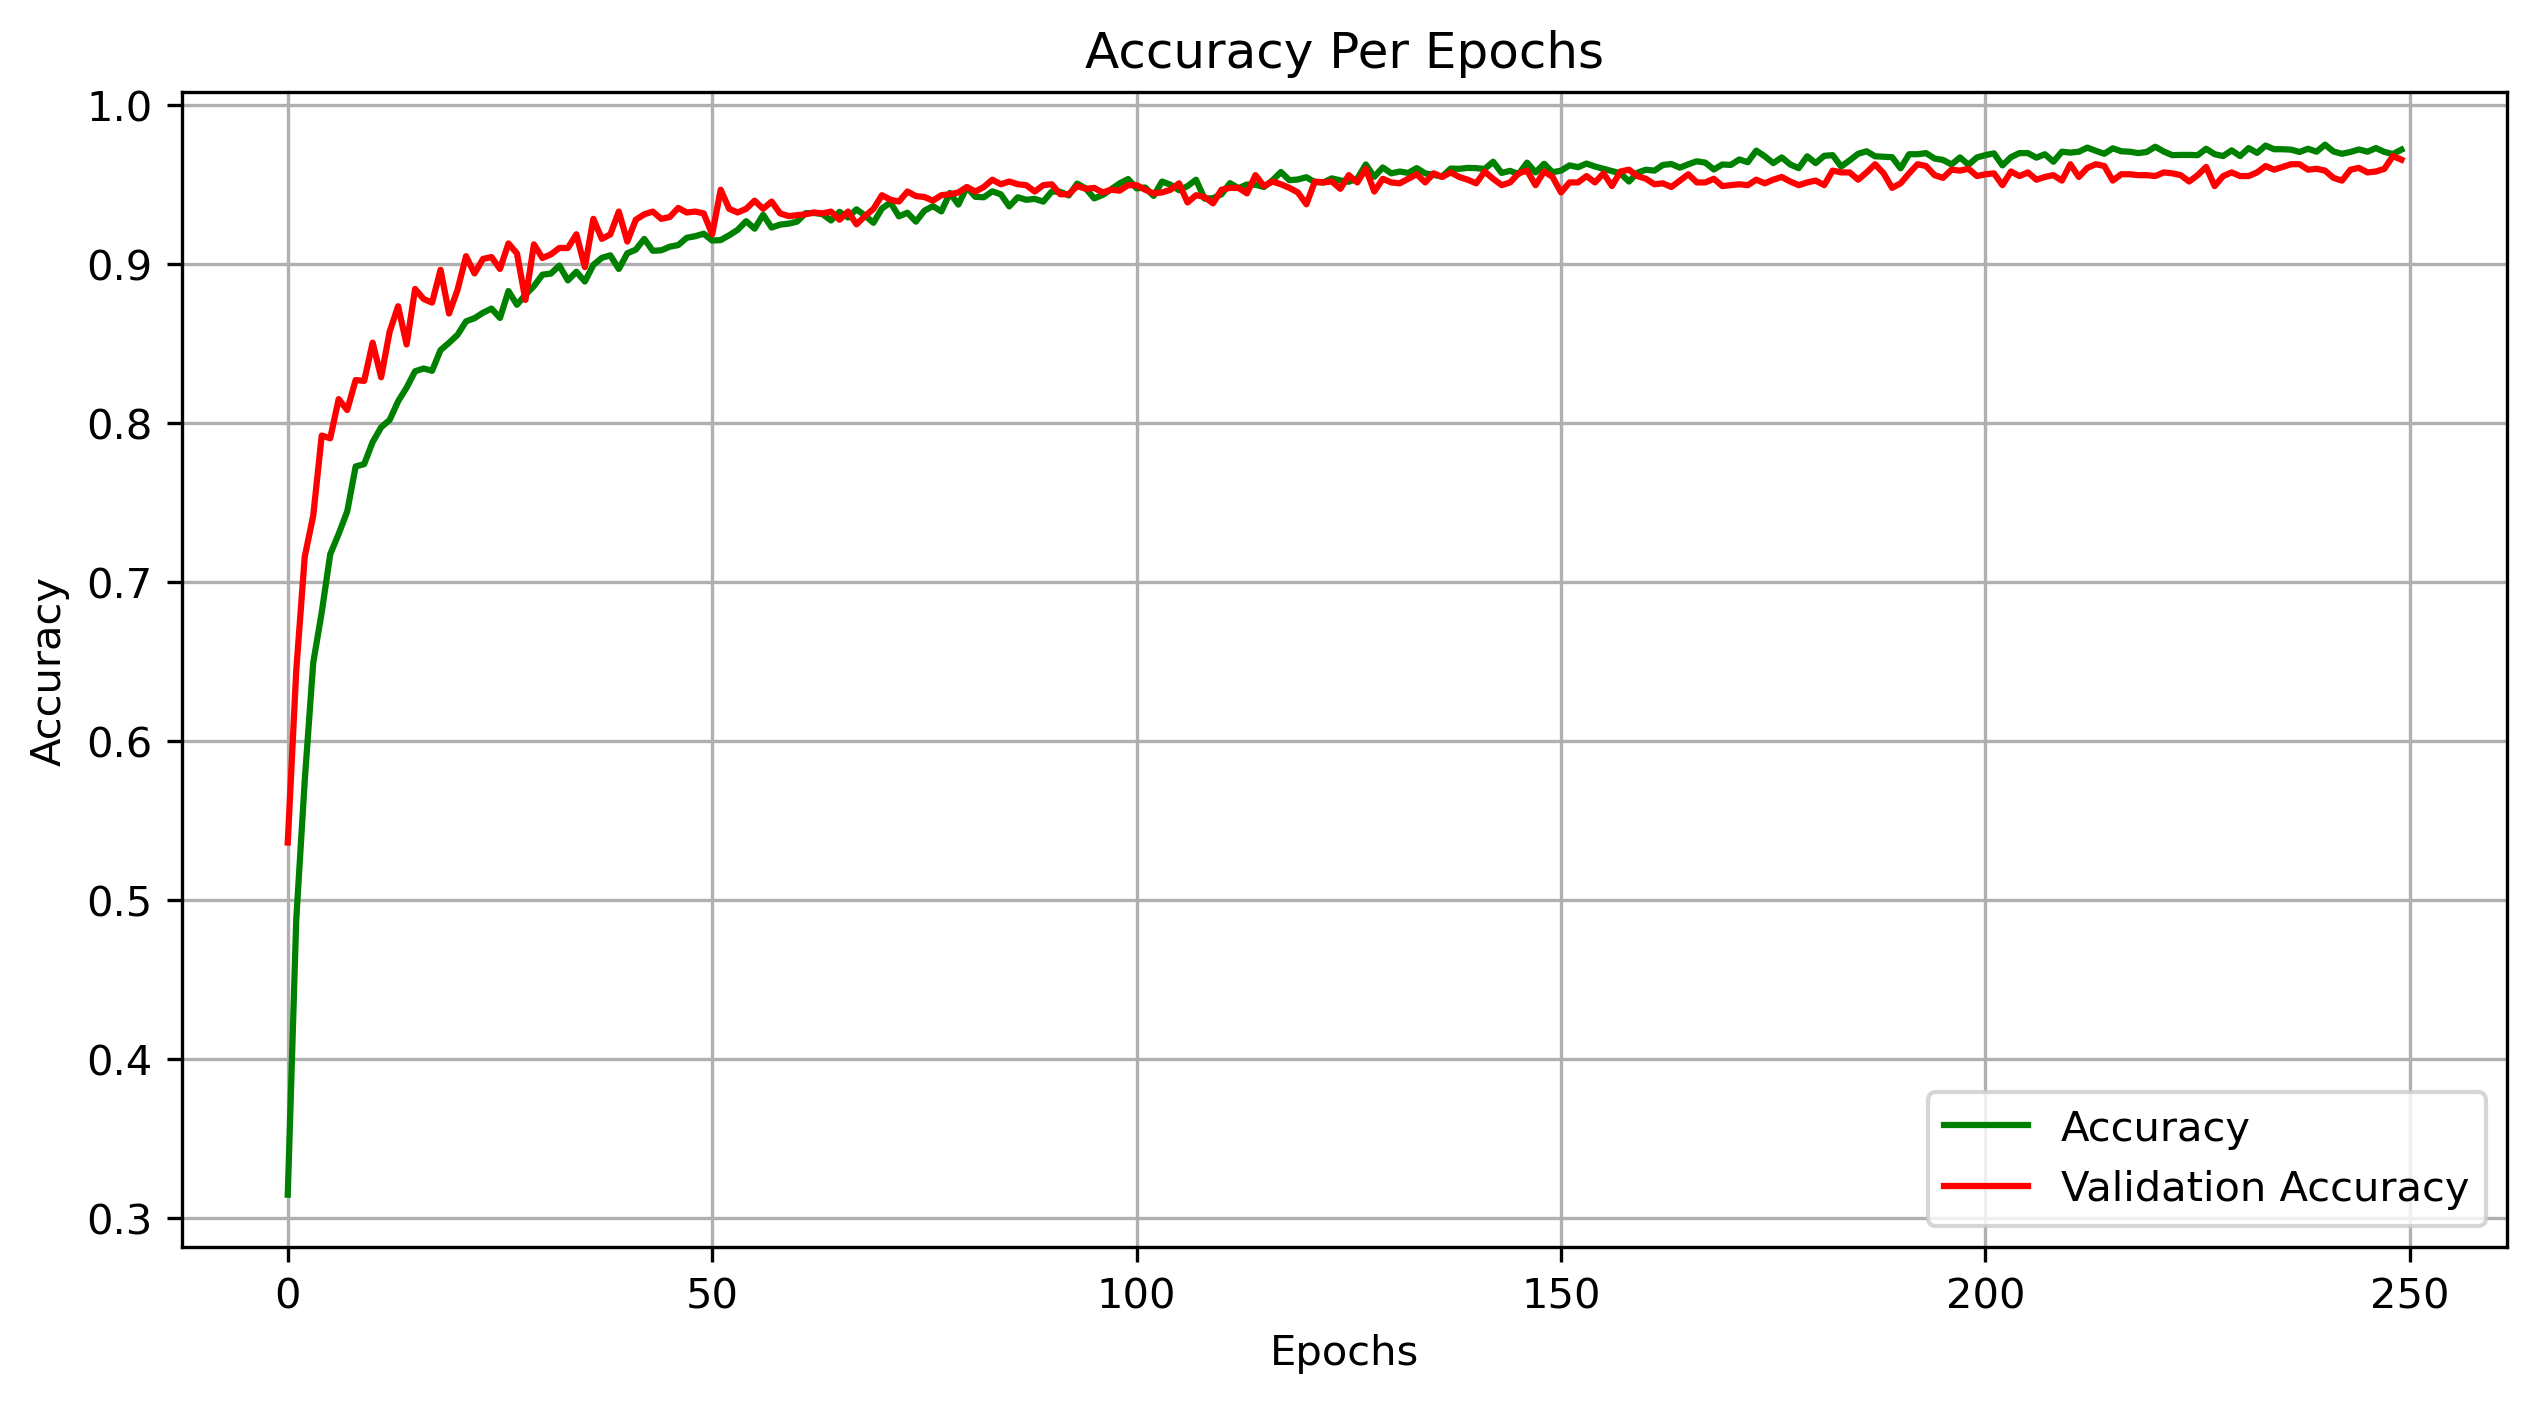

In [28]:
# Create a figure for the accuracy plot
plt.figure(figsize=(10, 5), dpi=300)

# Plot training and validation accuracy
plt.plot(train_hist_m1['accuracy'], label='Accuracy', color='green')
plt.plot(train_hist_m1['val_accuracy'], label='Validation Accuracy', color='red')

# Add legend to the plot
plt.legend()

# Set the title and labels
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Optional: Add a grid for better readability
plt.grid()

# Display the plot
plt.show()

In [30]:
# Evaluate the model on the test set
acc_m1 = ANN_Model.evaluate(X_test, y_test, verbose=0)

# Start timing the prediction process
t0 = time.time()
y_pred_m1 = ANN_Model.predict(X_test, verbose=0)
pred_m1 = round(time.time() - t0, 3)

# Create a DataFrame entry for logging
log_entry = pd.DataFrame(
    [["ANN", acc_m 1[1] * 100, train_m1, pred_m1]], 
    columns=log_cols
)

# Append the log entry to the existing log DataFrame
log = log.append(log_entry, ignore_index=True)

In [32]:
# Function to predict the feature
def ANN_Prediction(file_name, model, label_encoder):
    """
    Predict the class of an audio file using a trained ANN model.

    Parameters:
    - file_name: str, path to the audio file
    - model: trained ANN model
    - label_encoder: LabelEncoder instance for decoding class labels

    Returns:
    - None
    """
    # Load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")

    # Extract MFCC features
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)

    # Scale the features by taking the mean across time frames
    feature_scaled = np.mean(feature.T, axis=0)

    # Prepare the feature for prediction
    prediction_feature = np.array([feature_scaled])

    # Get the predicted class ID using argmax
    predicted_vector = np.argmax(model.predict(prediction_feature), axis=-1)

    # Decode the class label from class ID
    predicted_class = label_encoder.inverse_transform(predicted_vector)

    # Display the result
    print("ANN has predicted the class as -->", predicted_class[0])

In [34]:
# File name of the audio to be predicted
file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"

# Get the output from the ANN prediction function
ANN_Prediction(file_name, ANN_Model, le)

# Play the audio file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
ANN has predicted the class as --> Dog Bark


In [36]:
# Split the dataset into training/validation and test sets
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)

# Further split the training/validation set into training and validation sets
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)

# Print the number of samples in each set
print("\nNumber of samples for Train set:", xTrain.shape[0])
print("Number of samples for Validation set:", xvalid.shape[0])
print("Number of samples for Test set:", xTest.shape[0])

# Expand dimensions for the training and validation sets
xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

# Print the shapes of the training and test sets
print("Shape of X Train:", xTrain.shape)
print("Shape of X Test:", xTest.shape)


Number of samples for Train set: 6286
Number of samples for Validation set: 1572
Number of samples for Test set: 874
Shape of X Train: (6286, 128, 1)
Shape of X Test: (874, 128)


In [38]:
# Reshape the training and test datasets
xtrain = xTrain.reshape(xTrain.shape[0], 16, 8, 1)
xtest = xTest.reshape(xTest.shape[0], 16, 8, 1)

# Print the shapes of the reshaped datasets
print("The Shape of X Train:", xtrain.shape)
print("The Shape of Y Train:", yTrain.shape)
print("The Shape of X Test:", xtest.shape)
print("The Shape of Y Test:", yTest.shape)

The Shape of X Train: (6286, 16, 8, 1)
The Shape of Y Train: (6286, 10)
The Shape of X Test: (874, 16, 8, 1)
The Shape of Y Test: (874, 10)


In [42]:
# Initialize the CNN model
CNN_Model = Sequential()

# Add convolutional layers with max pooling
CNN_Model.add(Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1)))
CNN_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN_Model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
CNN_Model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer to reduce overfitting
CNN_Model.add(Dropout(0.1))

# Flatten the output and add dense layers
CNN_Model.add(Flatten())
CNN_Model.add(Dense(1024, activation="tanh"))
CNN_Model.add(Dense(10, activation="softmax"))

# Display the model summary
CNN_Model.summary()

# Compile the model
CNN_Model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Start timing the training process
t0 = time.time()

# Train the model
CNN_Results = CNN_Model.fit(
    xtrain, yTrain, 
    epochs=250, 
    batch_size=50, 
    validation_data=(xtest, yTest)
)

# Save the trained model
CNN_Model.save("Model3.h5")
print("CNN Model Saved")

# Record the training history
train_hist_m3 = pd.DataFrame(CNN_Results.history)
train_m3 = round(time.time() - t0, 3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 16, 8, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,134,346 (4.33 MB)

 Trainable params: 1,134,346 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4531 - loss: 1.6930 - val_accuracy: 0.7449 - val_loss: 0.7730
Epoch 2/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7834 - loss: 0.6519 - val_accuracy: 0.7918 - val_loss: 0.6180
Epoch 3/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8516 - loss: 0.4472 - val_accuracy: 0.8146 - val_loss: 0.5499
Epoch 4/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9041 - loss: 0.2899 - val_accuracy: 0.8570 - val_loss: 0.4759
Epoch 5/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9097 - loss: 0.2553 - val_accuracy: 0.8341 - val_loss: 0.5226
Epoch 6/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9216 - loss: 0.2113 - val_accuracy: 0.8741 - val_loss: 0.4070
Epoch 7/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9469 - loss: 0.1601 - val_accuracy: 0.8593 - val_loss: 0.4547
Epoch 8/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9526 - loss: 0.1301 - 

CNN Model Saved


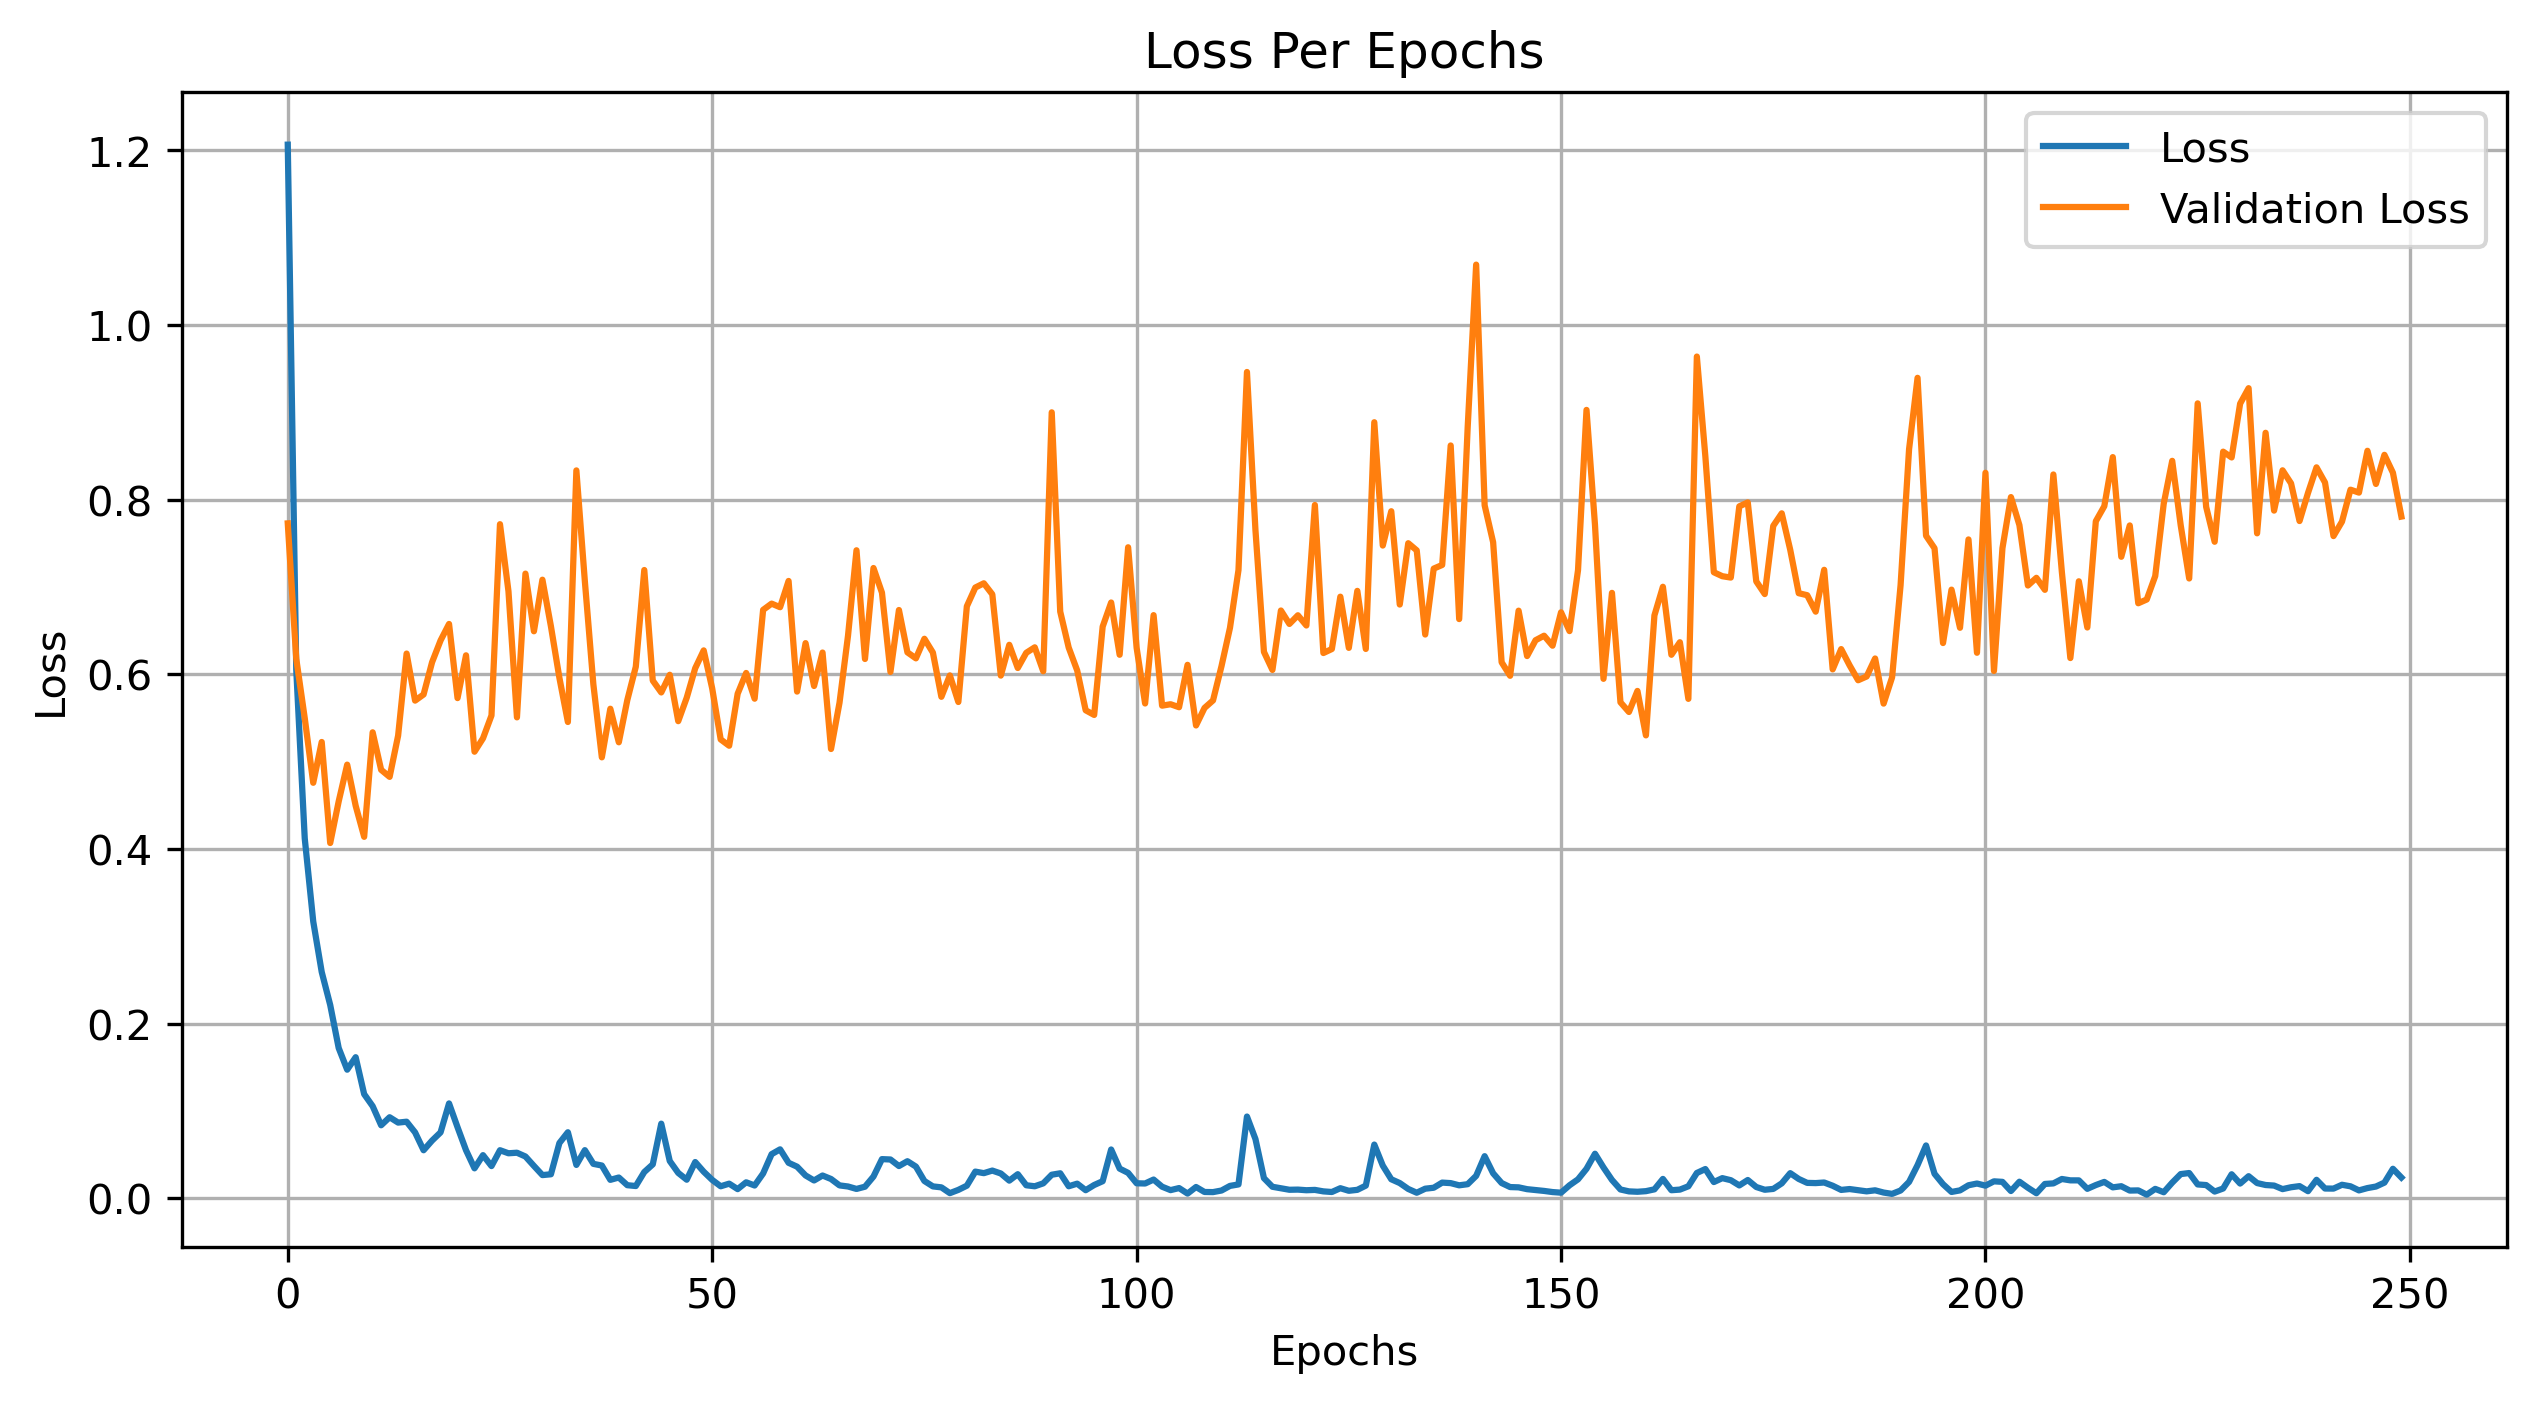

In [44]:
# Create a figure for the loss plot
plt.figure(figsize=(10, 5), dpi=300)

# Plot training and validation loss
plt.plot(train_hist_m3[["loss", "val_loss"]])

# Add legend to the plot
plt.legend(["Loss", "Validation Loss"])

# Set the title and labels
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Optional: Add a grid for better readability
plt.grid()

# Display the plot
plt.show()

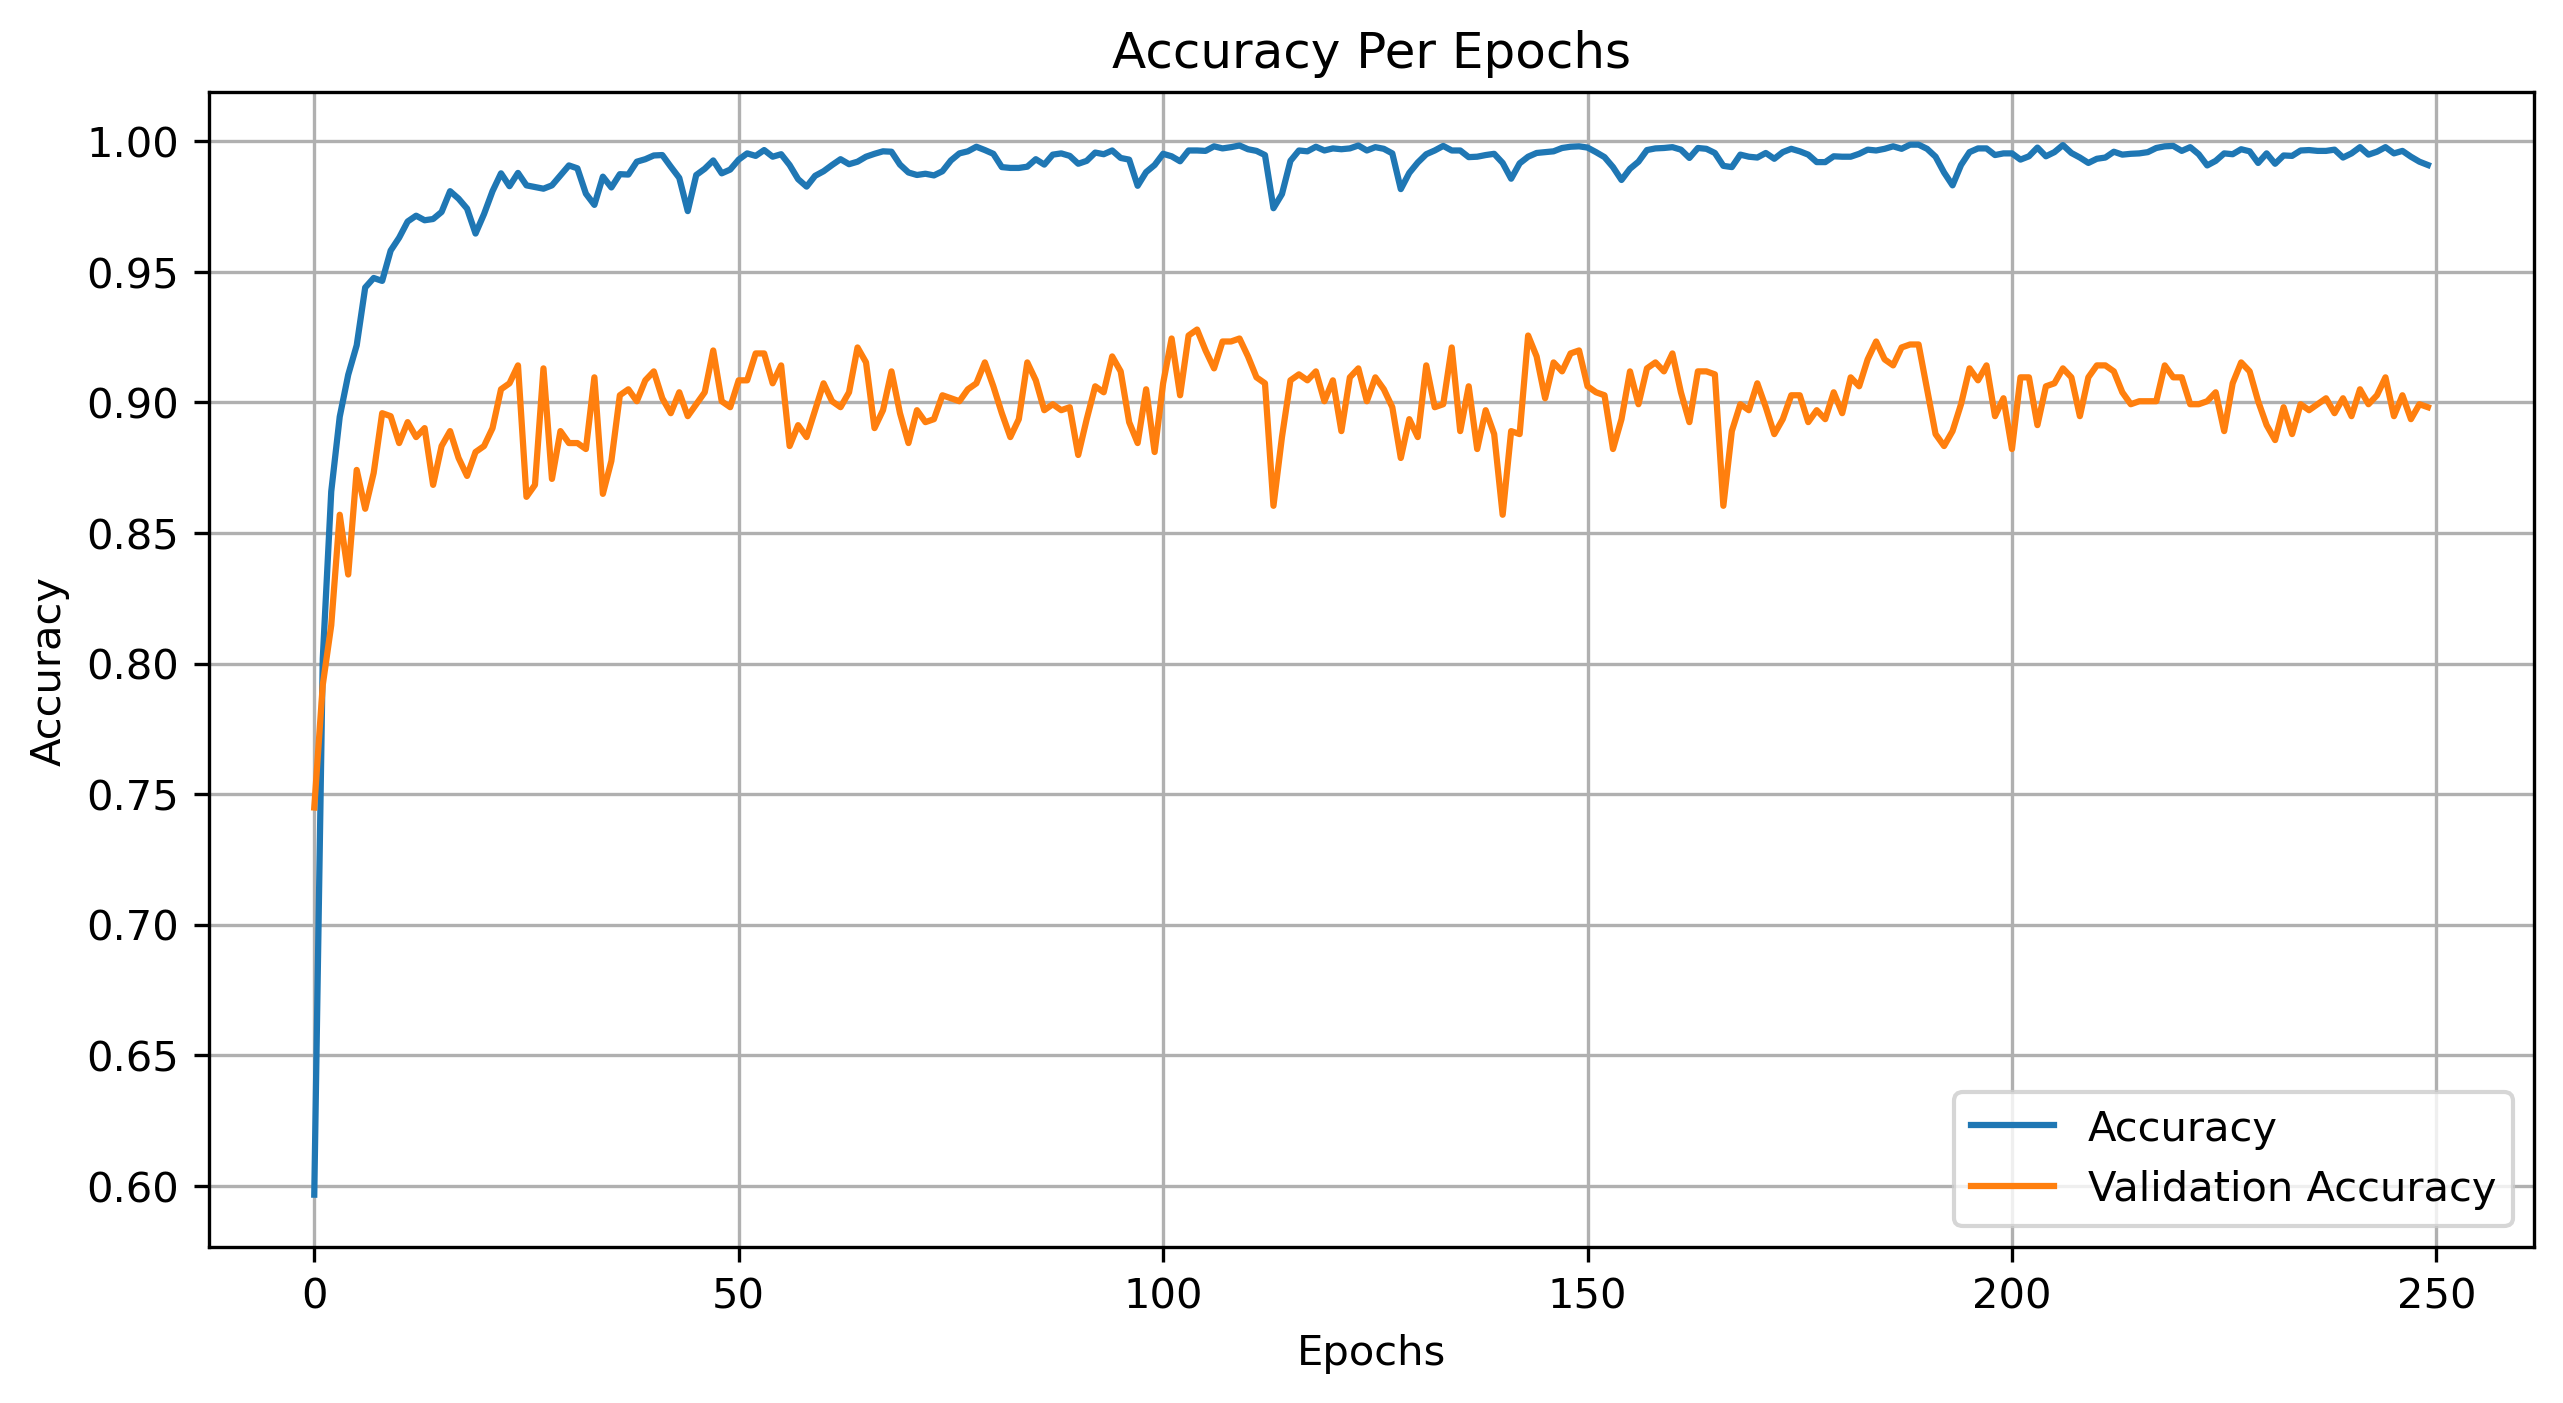

In [46]:
# Create a figure for the accuracy plot
plt.figure(figsize=(10, 5), dpi=300)

# Plot training and validation accuracy
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])

# Add legend to the plot
plt.legend(["Accuracy", "Validation Accuracy"])

# Set the title and labels
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Optional: Add a grid for better readability
plt.grid()

# Display the plot
plt.show()

In [48]:
# Evaluate the model on the test set
acc_m3 = CNN_Model.evaluate(xtest, yTest, verbose=0)

# Start timing the prediction process
t0 = time.time()
y_pred_m3 = CNN_Model.predict(xtest, verbose=0)
pred_m3 = round(time.time() - t0, 3)

# Create a log entry for the model's performance
log_entry = pd.DataFrame(
    [["CNN2D", acc_m3[1] * 100, train_m3, pred_m3]], 
    columns=log_cols
)

# Append the log entry to the existing log
log = log.append(log_entry, ignore_index=True)

In [50]:
# Function to predict the class of an audio file using a CNN model
def CNN_Prediction(file_name):
    # Load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    
    # Extract MFCC features from the audio data
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    
    # Scale the features by taking the mean across time frames
    feature_scaled = np.mean(feature.T, axis=0)
    
    # Create an array of features for prediction
    prediction_feature = np.array([feature_scaled])
    
    # Reshape the features to match the input shape of the model
    final_prediction_feature = prediction_feature.reshape(
        prediction_feature.shape[0], 16, 8, 1
    )
    
    # Predict the class using the CNN model
    predicted_vector = np.argmax(CNN_Model.predict(final_prediction_feature), axis=-1)
    
    # Get the class label from the predicted class ID
    predicted_class = le.inverse_transform(predicted_vector)
    
    # Display the result
    print("CNN2D has predicted the class as -->", predicted_class[0])

In [52]:
# Define the file name of the audio file
file_name = audio_dataset_path + "fold8/33340-7-7-0.wav"

# Get the predicted class for the audio file
CNN_Prediction(file_name)

# Play the audio file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
CNN2D has predicted the class as --> Jackhammer


In [54]:
# Set default figure size and resolution for Matplotlib plots
plt.rcParams["figure.figsize"] = (17, 2)  # Width: 17 inches, Height: 2 inches
plt.rcParams["figure.dpi"] = 550          # Set the resolution to 550 dots per inch

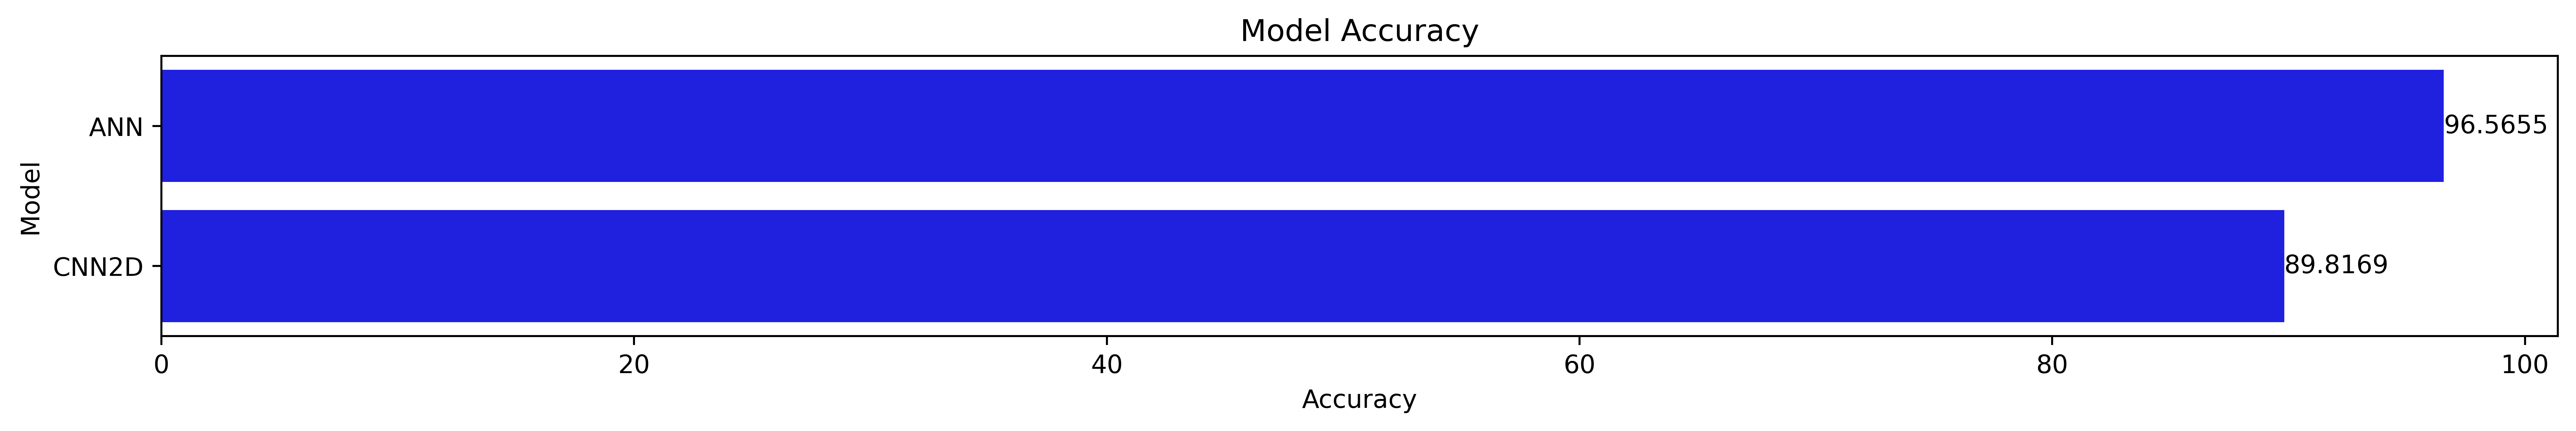

In [56]:
# Create a bar plot to visualize model accuracy
ax = sns.barplot(x="accuracy", y="model", data=log, color="b")

# Add labels to the bars for better readability
ax.bar_label(ax.containers[0])

# Set the x and y labels
plt.xlabel("Accuracy")
plt.ylabel("Model")

# Set the title of the plot
plt.title("Model Accuracy")

# Display the plot
plt.show()

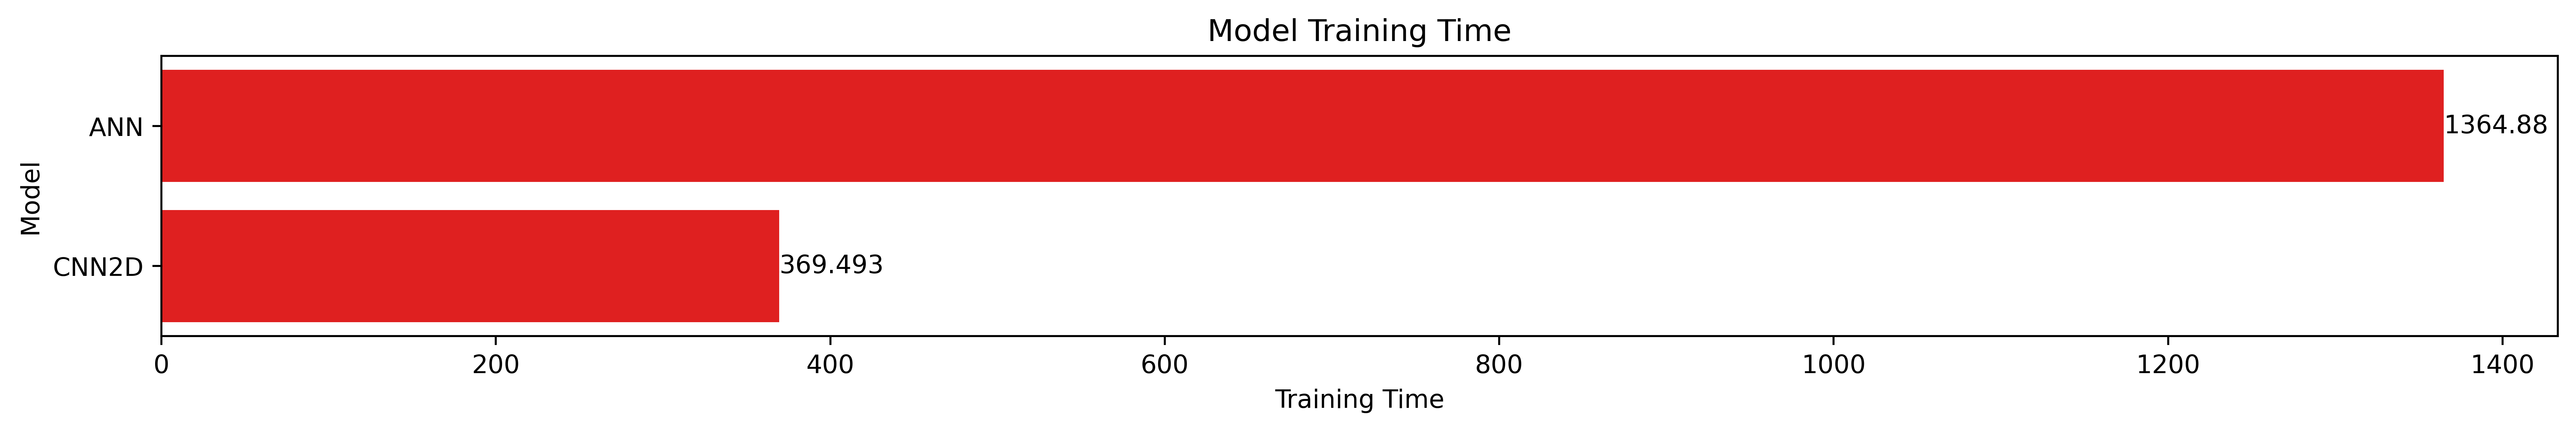

In [58]:
# Create a bar plot to visualize model training time
ax = sns.barplot(x="train_time", y="model", data=log, color="r")

# Add labels to the bars for better readability
ax.bar_label(ax.containers[0])

# Set the x and y labels
plt.xlabel("Training Time")
plt.ylabel("Model")

# Set the title of the plot
plt.title("Model Training Time")

# Display the plot
plt.show()

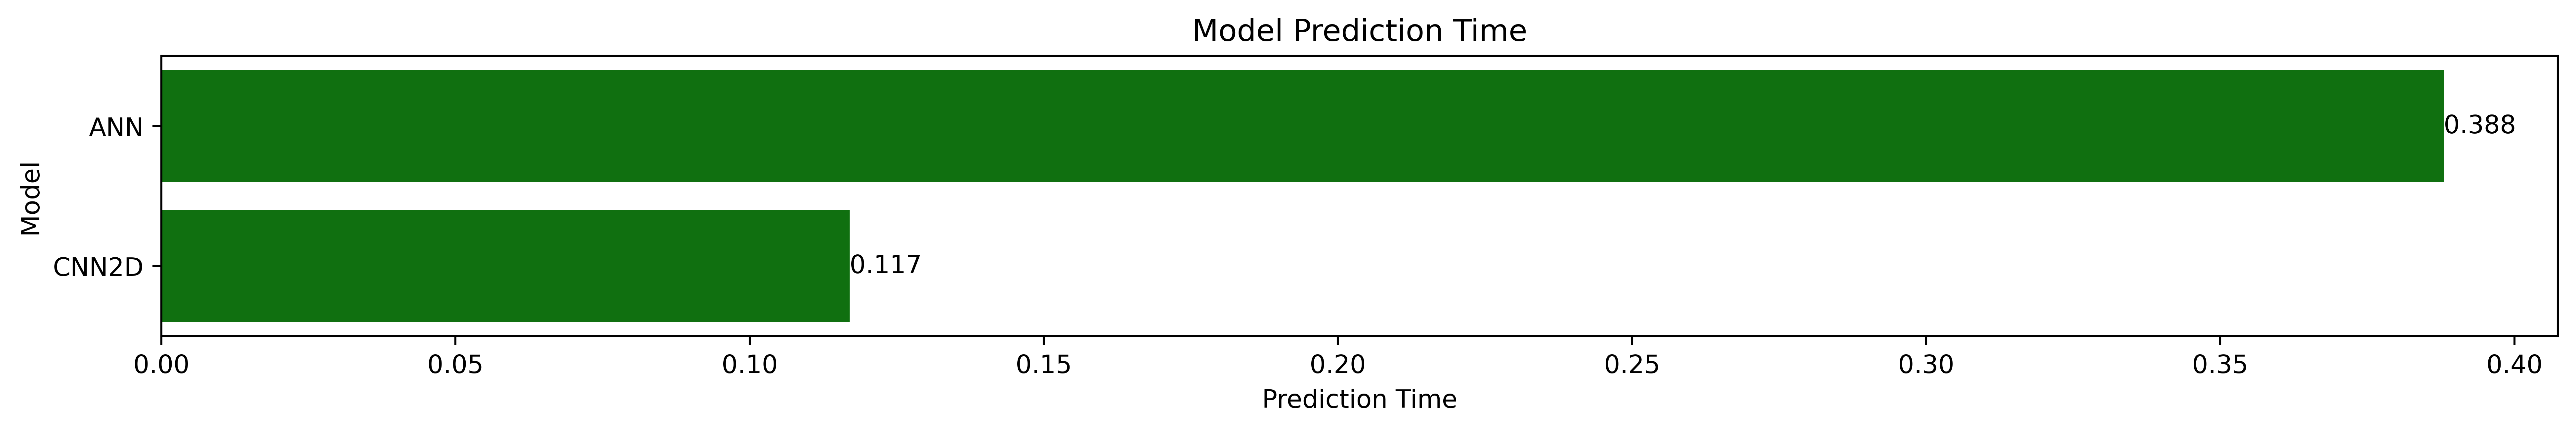

In [60]:
# Create a bar plot to visualize model prediction time
ax = sns.barplot(x="pred_time", y="model", data=log, color="g")

# Add labels to the bars for better readability
ax.bar_label(ax.containers[0])

# Set the x and y labels
plt.xlabel("Prediction Time")
plt.ylabel("Model")

# Set the title of the plot
plt.title("Model Prediction Time")

# Display the plot
plt.show()